# 1. Projekat iz predmeta Mašinsko učenje

Eye State Classification - EEG
https://www.kaggle.com/datasets/robikscube/eye-state-classification-eeg-dataset/data

Marija Cvetković 1940

Luka Kocić 2022

### Osnovne informacije o dataset-u.

Dataset sadrži podatke EEG merenja. EEG je metoda za merenje električne aktivnosti mozga pomoću elektroda postavljenih na površinu glave. Sadrži 14 kolona koje predtavljaju signale koji indukuju da li su oci otvorene ili zatvorene.
Elektrode iz frontalne oblasti (AF3, AF4, F3, F4, F7 i F8) mere moždanu aktivnost povezanu sa pažnjom i mentalnim stanjem, koja se menja kada su oči otvorene ili zatvorene. Signali iz okcipitalne regije (O1 i O2), koja je zadužena za vid, trebalo bi da su direktno povezane sa stanjem očiju.
Elektrode iz parijetalne i temporalne regije (P7, P8, T7 i T8) mere senzornu aktivnost i ne bi trebalo da imaju preveliku konkciju sa tim da li su oci otvorene ili zatvorene. 

1. AF3 i AF4 se nalaze kod obrva i izuzetno su osetljivi na pokrete očiju. Kada se oko zatvori ili trepne trebalo bi da signal pravi veliki pik
2. F7 i F8 blizu očiju, levo i desno.
3. F3 i F4 takođe blizu očiju, ali ne koliko i prethodna dva
4. FC5 i FC6 mešavina frontalne i centralne aktivnosti
5. T7 i T8 nalaze se sa strane glave i ne bi trebalo toliko da utiču na treptaje, nalaze se daleko
6. P7 i P8 su senzorni regioni
7. O1 i O2 direktno vezani za vid, tako da bi trebalo da jako utiču.

Videćemo realni uticaj dalje prilikom ispitivanja našeg dataset-a.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif


In [2]:
df = pd.read_csv("input-eeg.csv")

## Analiza podataka

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   F7            14980 non-null  float64
 2   F3            14980 non-null  float64
 3   FC5           14980 non-null  float64
 4   T7            14980 non-null  float64
 5   P7            14980 non-null  float64
 6   O1            14980 non-null  float64
 7   O2            14980 non-null  float64
 8   P8            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  FC6           14980 non-null  float64
 11  F4            14980 non-null  float64
 12  F8            14980 non-null  float64
 13  AF4           14980 non-null  float64
 14  eyeDetection  14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


In [4]:
df.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


In [5]:
df['eyeDetection'].value_counts()

eyeDetection
0    8257
1    6723
Name: count, dtype: int64

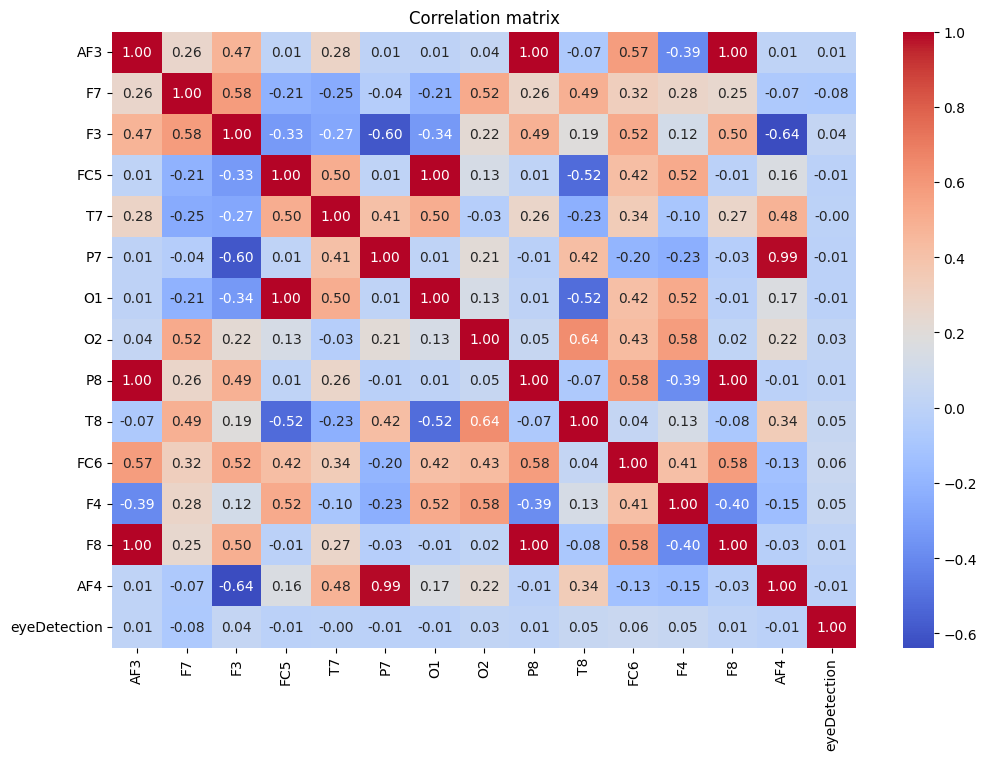

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Correlation matrix")
plt.show()

Na osnovu matrice korelacije možemo da zaključimo sledeće:

1. EyeDetection kolona prema matrici korelacije trenutno nema linearnu vezu sa ostalim kanalima sve vrednosti su izmedju 0.00 i -0.06 (jer je eyeDetection boolean)

2. Postoje visoke korelacije izmedju AF3 i F8 (1.00), AF3 i P8 (1.00), P8 i F8(1.00), FC5 i O1 (1.00), PC8 i F8 (1.00)  kao i izmedju P7 i AF4(0.99). Imamo duplirane podatke što znači da model može da bude nestabilan. Trebalo bi da je moguće izbaciti neku od ovih kolona zbog visoke korelacije.

Koristimo point-beserial metodu da bismo videli korelaciju sa eyeDetection kolonom:

In [7]:
from scipy.stats import pointbiserialr

for col in df.select_dtypes(include='number'):
    corr, p_value = pointbiserialr(df["eyeDetection"], df[col])
    print(f"{col}: {abs(corr):.4f}")

AF3: 0.0105
F7: 0.0800
F3: 0.0389
FC5: 0.0075
T7: 0.0004
P7: 0.0078
O1: 0.0072
O2: 0.0251
P8: 0.0096
T8: 0.0472
FC6: 0.0643
F4: 0.0480
F8: 0.0131
AF4: 0.0075
eyeDetection: 1.0000


## Deskriptivna analiza i čišćenje podataka

In [8]:
df.isnull().sum()

AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64

In [9]:
df.duplicated().any()

np.False_

In [10]:
df = df.drop_duplicates()

### Detekcija outlier-a


Box plot nad svim numerickim podacima

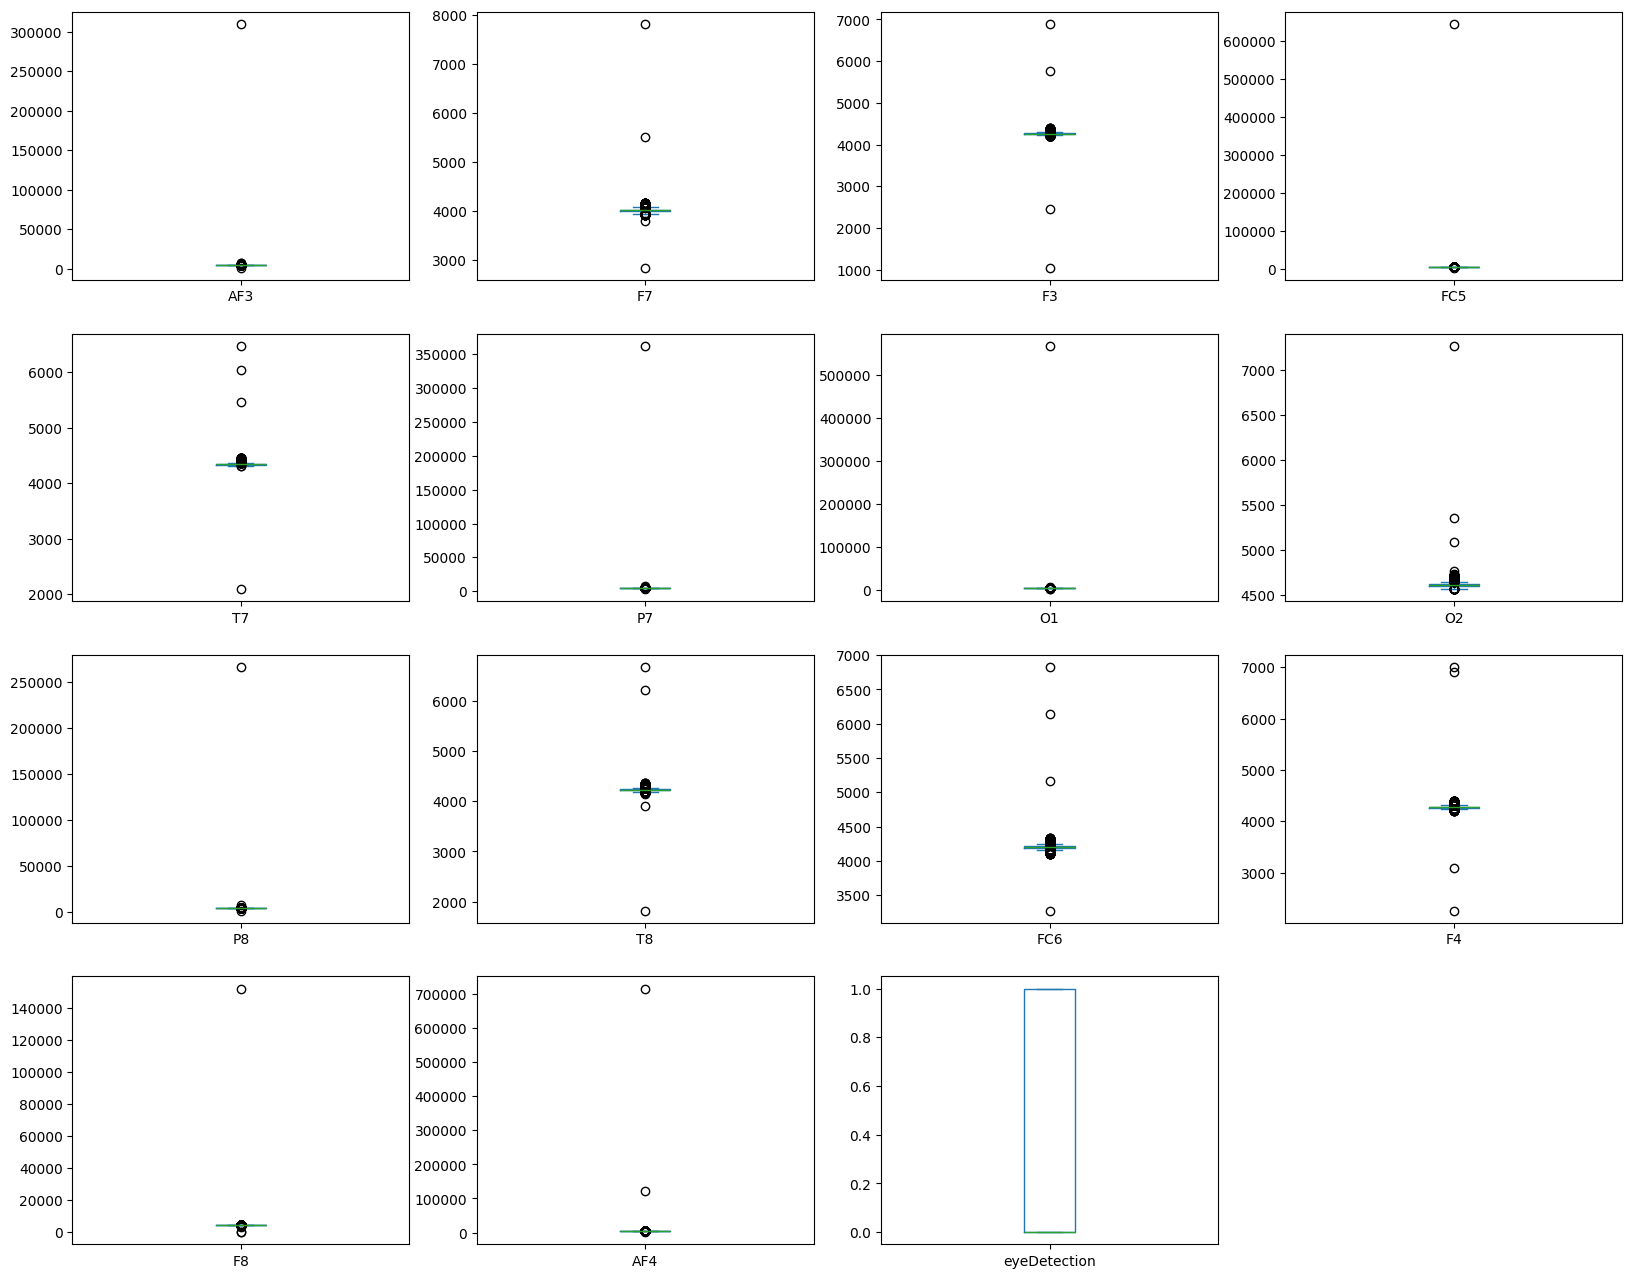

In [11]:
number_columns = df.select_dtypes(include='number')
number_columns.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,16))
plt.show()

Vizualizacija outlier-a pomoću boxplot-a, scatter plot-a i histograma:

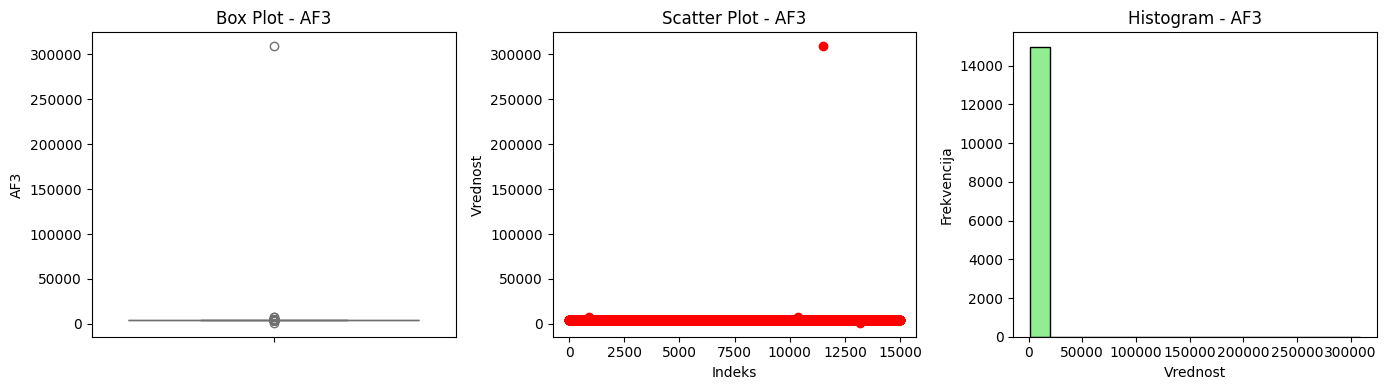

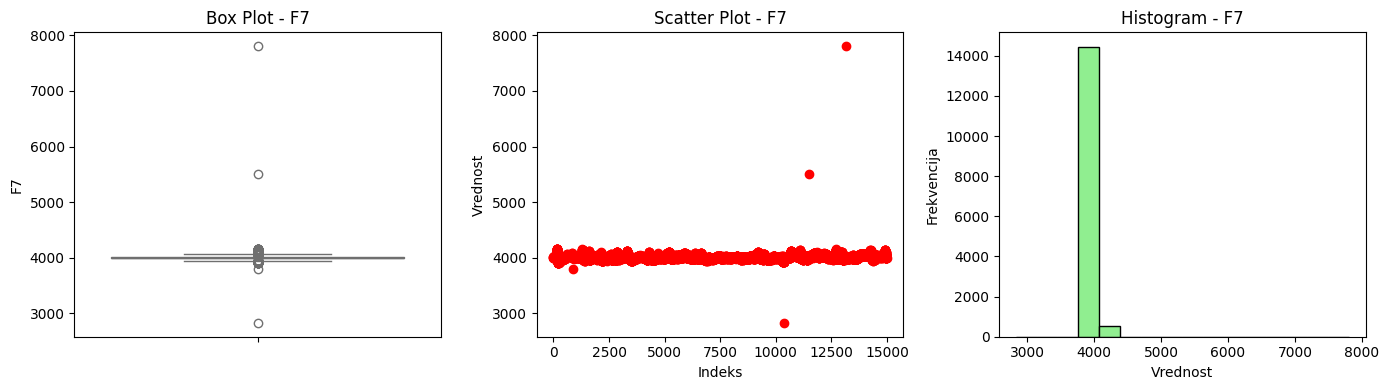

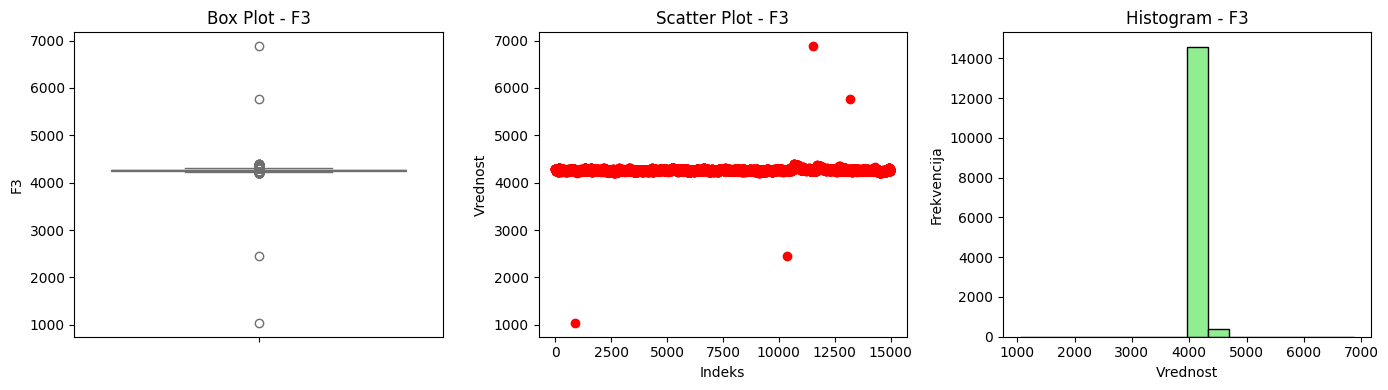

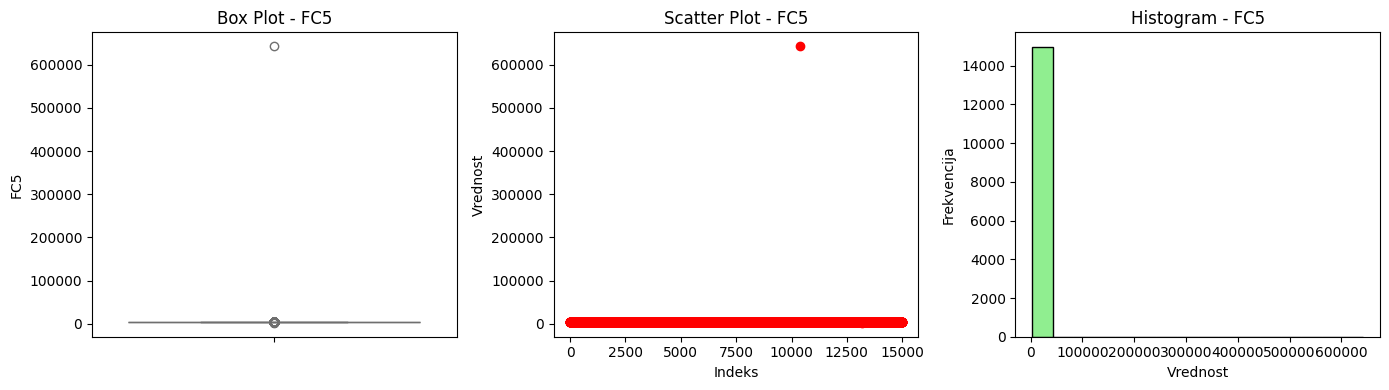

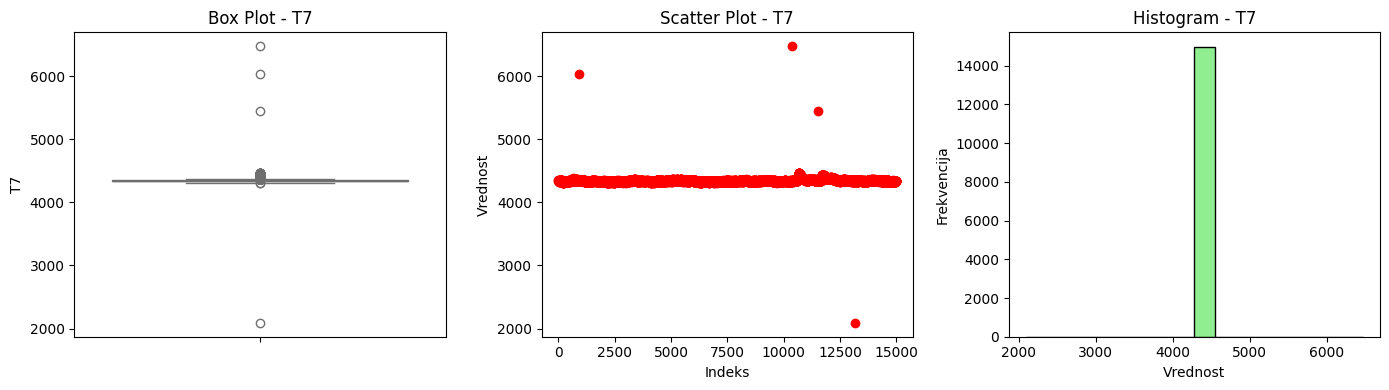

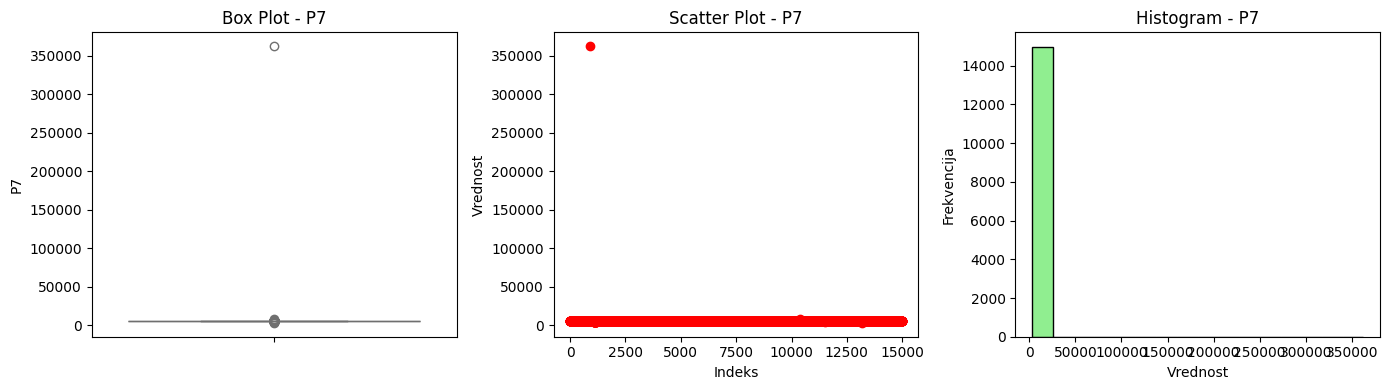

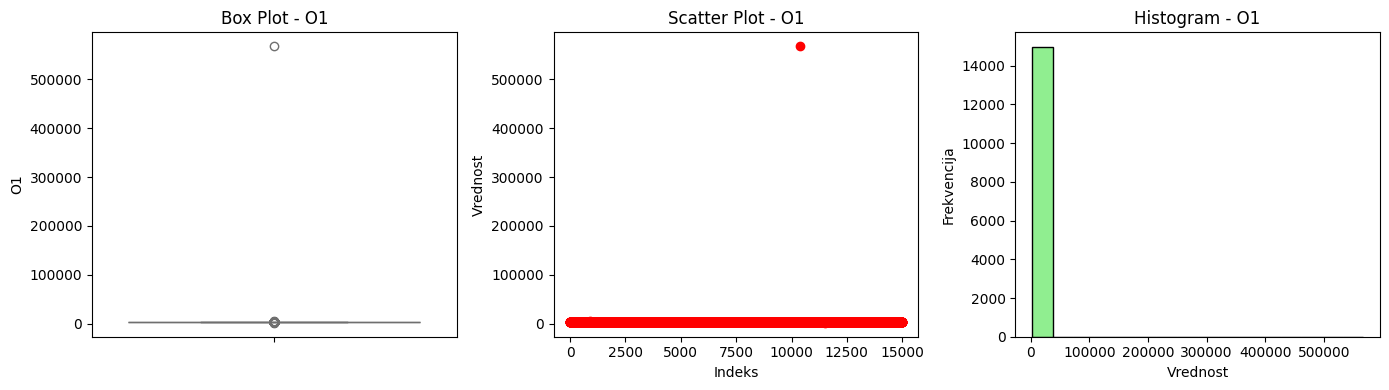

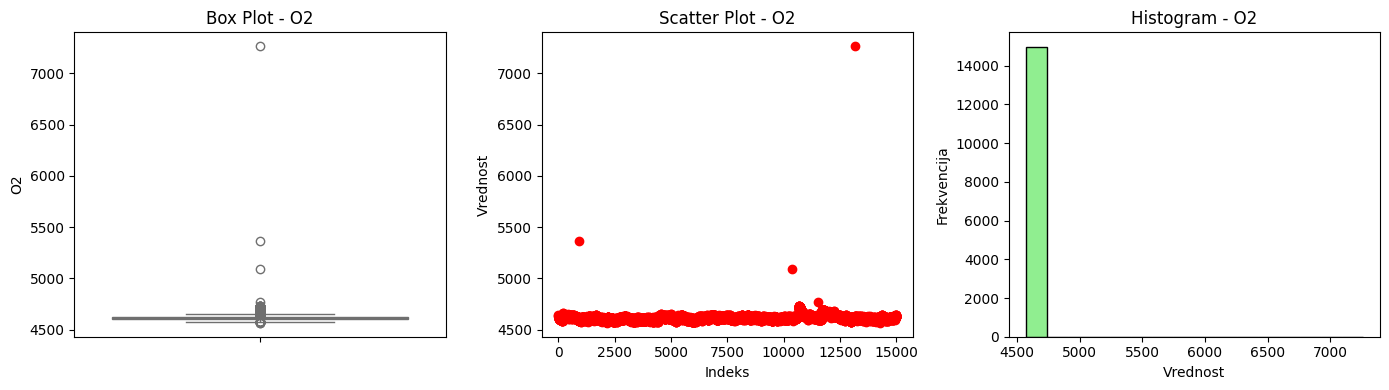

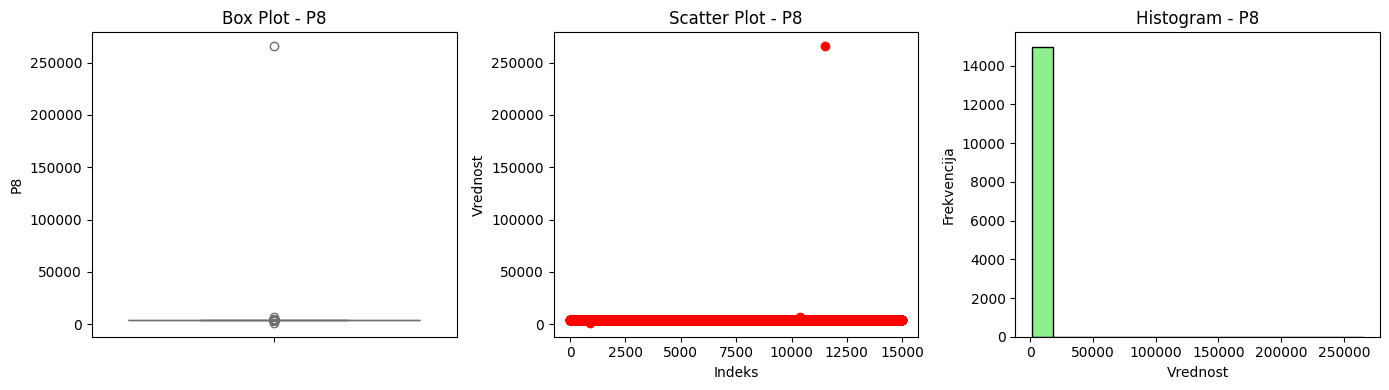

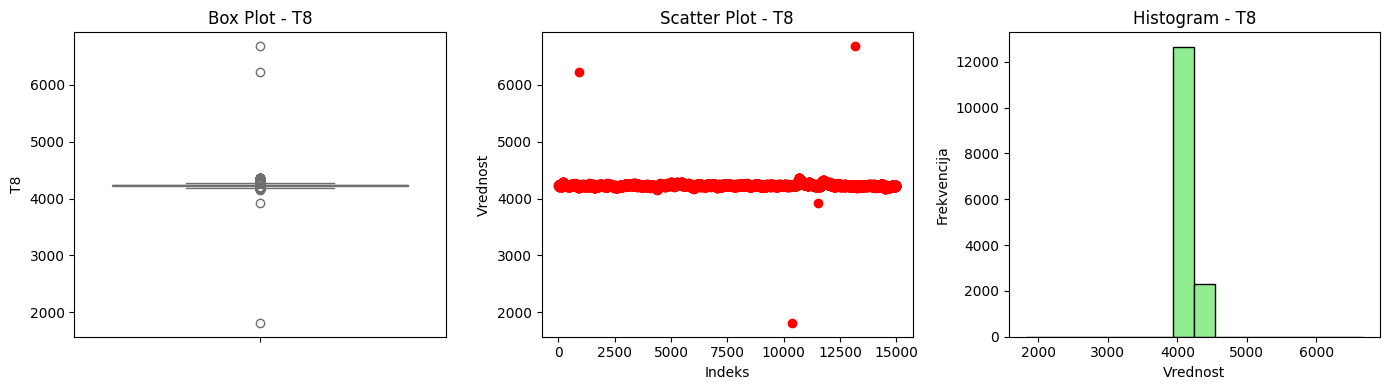

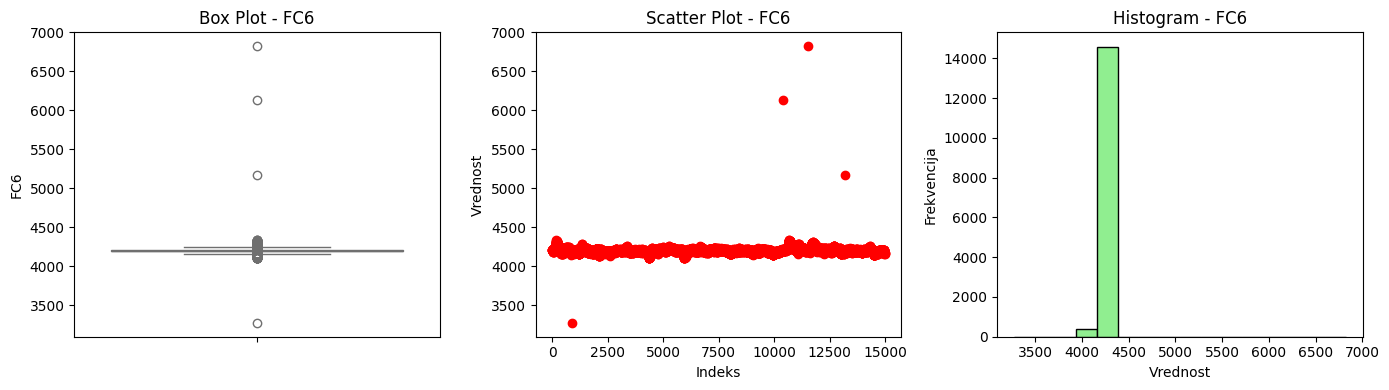

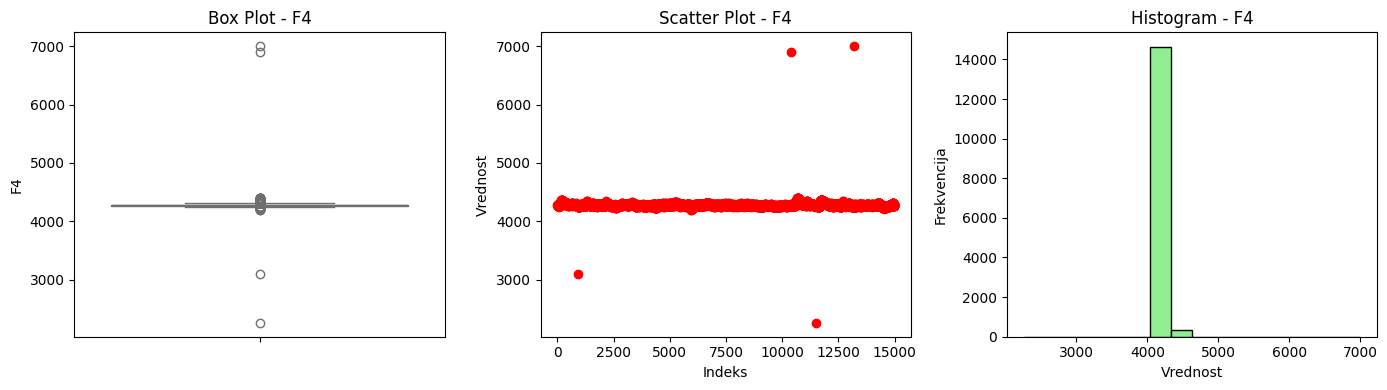

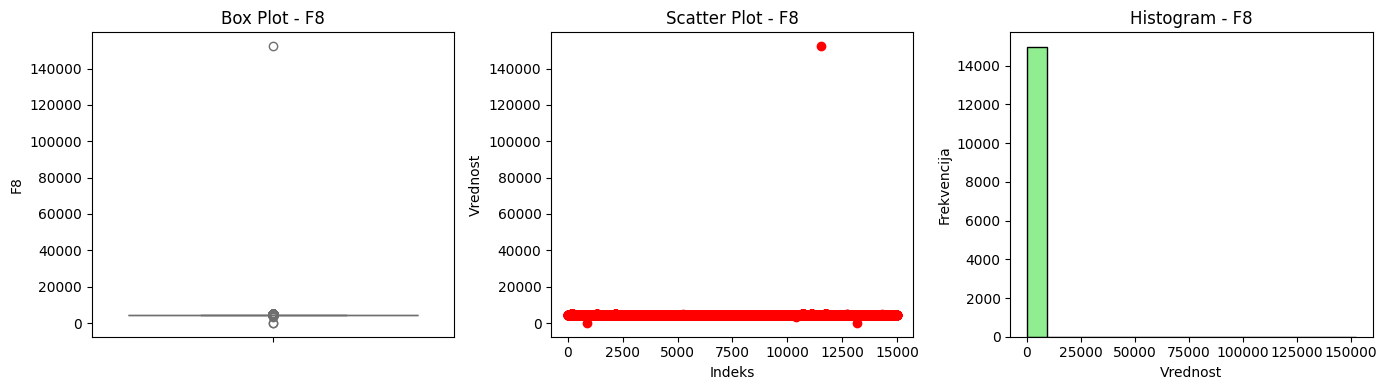

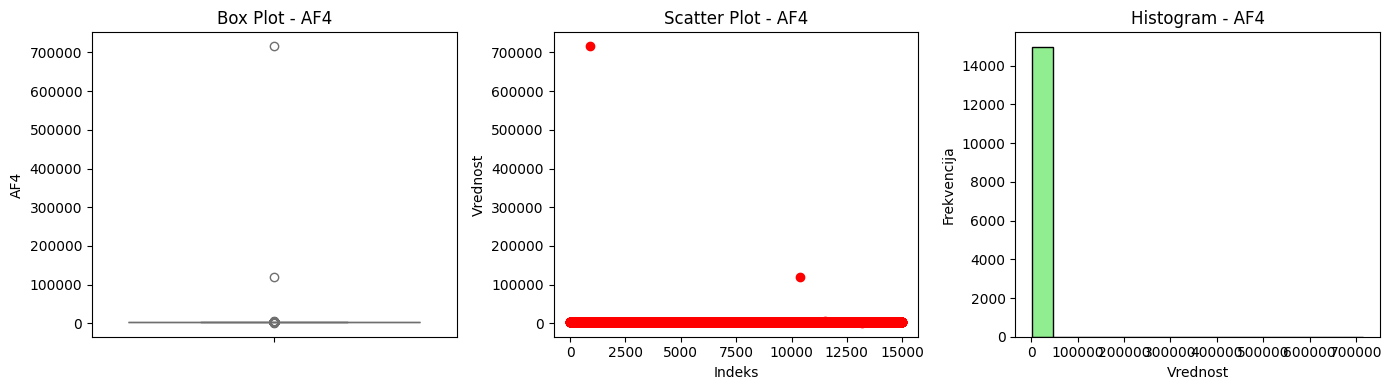

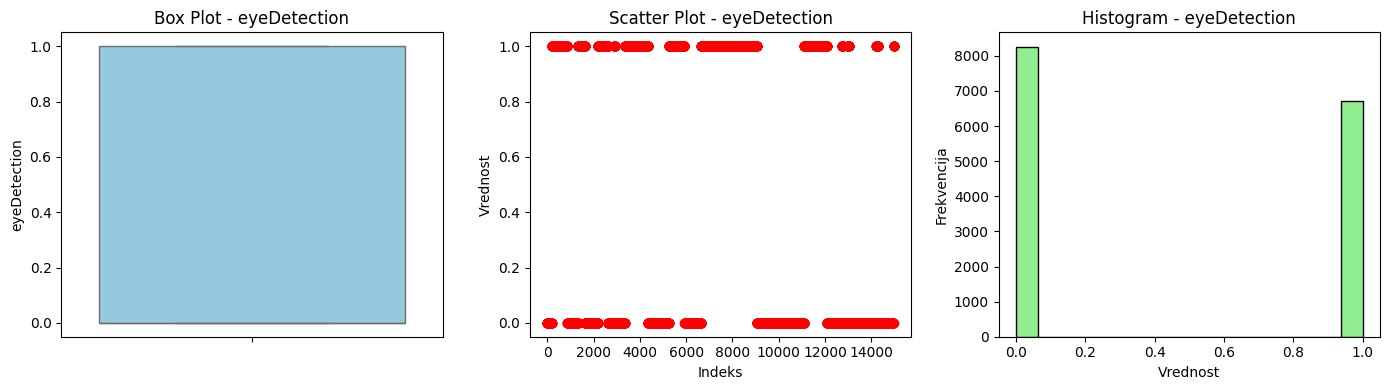

In [12]:
for column in number_columns.columns:
        plt.figure(figsize=(14, 4))
        
        # Box plot
        plt.subplot(1, 3, 1)
        sns.boxplot(y=df[column], color='skyblue')
        plt.title(f"Box Plot - {column}")
        
        # Scatter plot
        plt.subplot(1, 3, 2)
        plt.scatter(x=range(len(df)), y=df[column], color='red')
        plt.title(f"Scatter Plot - {column}")
        plt.xlabel("Indeks")
        plt.ylabel("Vrednost")
        
        # Histogram
        plt.subplot(1, 3, 3)
        plt.hist(df[column], bins=16, color='lightgreen', edgecolor='black')
        plt.title(f"Histogram - {column}")
        plt.xlabel("Vrednost")
        plt.ylabel("Frekvencija")
        
        plt.tight_layout()
        plt.show()

Primena IQR i Z_Score metode za detekciju outlier-a:

In [13]:
for column in number_columns.columns:
        print(f"\n--- Kolona: {column} ---")

        # IQR metoda
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        donja_granica = Q1 - 1.5 * IQR
        gornja_granica = Q3 + 1.5 * IQR
        outlieri_iqr = df[(df[column] < donja_granica) | (df[column] > gornja_granica)]
        print("Outlieri po IQR metodi:")
        print(outlieri_iqr)

        # Z-Score metoda
        mean = df[column].mean()
        std = df[column].std()
        z_scores = (df[column] - mean) / std
        outlieri_zscore = df[(z_scores > 3) | (z_scores < -3)]
        print("Outlieri po Z-Score metodi:")
        print(outlieri_zscore)


--- Kolona: AF3 ---
Outlieri po IQR metodi:
           AF3       F7       F3      FC5       T7       P7       O1       O2  \
152    4375.38  4072.82  4263.08  4150.26  4337.95  4582.56  4056.92  4599.49   
153    4401.54  4090.26  4267.18  4156.41  4336.92  4586.15  4053.33  4598.97   
154    4412.31  4094.36  4262.56  4149.23  4332.31  4591.79  4057.44  4611.28   
155    4416.92  4106.67  4261.03  4153.33  4334.87  4589.23  4062.56  4604.62   
156    4430.26  4123.08  4268.21  4156.92  4336.92  4592.31  4069.74  4592.82   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14935  4397.95  4096.41  4296.92  4155.90  4331.79  4605.13  4063.08  4616.92   
14936  4389.74  4092.82  4287.69  4157.95  4335.38  4607.69  4062.05  4612.82   
14937  4385.13  4089.23  4279.49  4155.90  4334.36  4607.18  4056.92  4614.36   
14938  4374.36  4083.08  4280.00  4155.38  4331.28  4603.08  4053.85  4605.64   
14939  4362.05  4070.26  4280.51  4150.77  4332.31  4599.49  405

U primeru iznad smo detektovali da imamo outlier-e. Sledeći korak je da vidimo koliko redova ima najmanje jedan outliere.

In [14]:
iqr_mask = pd.Series(False, index=df.index)
zscore_mask = pd.Series(False, index=df.index)

for column in number_columns.columns:
    # IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    donja = Q1 - 1.5 * IQR
    gornja = Q3 + 1.5 * IQR

    iqr_mask |= (df[column] < donja) | (df[column] > gornja)

    # Z-score
    std = df[column].std()
    if std != 0:
        z = (df[column] - df[column].mean()) / std
        zscore_mask |= (z > 3) | (z < -3)

print(f"Broj redova sa bar jednim IQR outlierom: {iqr_mask.sum()}")
print(f"Broj redova sa bar jednim Z-score outlierom: {zscore_mask.sum()}")


Broj redova sa bar jednim IQR outlierom: 3127
Broj redova sa bar jednim Z-score outlierom: 88


Realna situacija je dobijena Z-score metodom. Međutim kasnije ćemo testirati da li je dobro obrisati ove outliere prilikom treniranja modela.
Zašto? 
Naš zadatak je da utvrdimo da li su oči otvorene ili zatvorene, upravo treptaji, mikro-pokreti,prelazi otvorene/zatvorene oci, mogu praviti skokove u kanalima. Brisanjem outliera može da se izravna razliku između klasa i da se tim accuracy smanji.

## Treniranje modela

In [15]:
le = LabelEncoder()
y = df['eyeDetection']

X = df.drop(
    ['eyeDetection'],
    axis=1
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11984, 14)
(2996, 14)
(11984,)
(2996,)


### Lazy Predict

Iskoristili smo lazy predict da bismo videli otprilike koji osnovni accuracy da očekujemo i da nam pomogne pri izboru modela. Takođe,  koristan je da bi se ustanovilo da li je dataset veštački generisan ( da li dobijamo accuracy koji je bolji barem nego random pogadjanje).

In [16]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(
    verbose=0, 
    ignore_warnings=True, 
    custom_metric=None, 
    predictions=False,
)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 5313, number of negative: 6671
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3553
[LightGBM] [Info] Number of data points in the train set: 11984, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.443341 -> initscore=-0.227613
[LightGBM] [Info] Start training from score -0.227613
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.94               0.94     0.94      0.94   
XGBClassifier                      0.93               0.93     0.93      0.93   
RandomForestClassifier             0.92               0.92     0.92      0.92   
LGBMClassifier                     0.90

Funkcija za izveštaj o performansama modela:

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np


def report(title=None, estimator=None, X=None, y=None, cv=5):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

    y_true_all = []
    y_pred_all = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

        estimator.fit(X_train, y_train)
        y_pred_fold = estimator.predict(X_test)

        y_true_all.extend(list(y_test_fold))
        y_pred_all.extend(list(y_pred_fold))
        
    accuracy = accuracy_score(y_true_all, y_pred_all)

    return {
        "title": title,
        "accuracy": float(accuracy),
        "classification_report": classification_report(y_true_all, y_pred_all, output_dict=True),
        "confusion_matrix": confusion_matrix(y_true_all, y_pred_all)
    }

### Random Forest

In [45]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from imblearn.pipeline import Pipeline

def run_random_forest_classifier(preprocessors=None, X=None, y=None, cv=None, sampler=None):
    forest = RandomForestClassifier(random_state=42, n_jobs=1)
    
    steps = []
    if preprocessors:
        steps.extend([(f"prep_{i}", p) for i, p in enumerate(preprocessors)])
    if sampler is not None:
        steps.append(("sampler", sampler))
    steps.append(("model", forest))

    pipe = Pipeline(steps)
        
    res = report(estimator=pipe, X=X, y=y, title="Random Forest CV", cv=cv)
    return res["accuracy"]

### Extra Trees Classifier

Radi slično kao Random Forest Classifier, ali u praksi ima veću preciznost. \
n_estimators - broj stabala

In [46]:
from sklearn.ensemble import ExtraTreesClassifier


def run_extra_trees_classifier(preprocessors=None, X=None, y=None, cv=None, sampler=None):
    et_classifier = ExtraTreesClassifier(n_estimators=100, criterion='gini', random_state=42)

    steps = []
    if preprocessors:
        steps.extend([(f"prep_{i}", p) for i, p in enumerate(preprocessors)])
    if sampler is not None:
        steps.append(("sampler", sampler))
    steps.append(("model", et_classifier))

    pipe = Pipeline(steps)
    res = report(estimator=pipe, X=X, y=y, title="Extra Trees Classifier CV", cv=cv)
        
    return res["accuracy"]        

### K-Nearest Neighbours (KNN)

K - broj najbiližih tačaka koje su uzimaju u obzir

In [47]:
from sklearn.neighbors import KNeighborsClassifier

def run_knn_classifier(preprocessors=None, X=None, y=None, cv=None, sampler=None):
    steps = []
    if preprocessors:
        steps.extend([(f"prep_{i}", p) for i, p in enumerate(preprocessors)])
    if sampler is not None:
        steps.append(("sampler", sampler))
    steps.append(("model", KNeighborsClassifier()))

    pipe = Pipeline(steps)  

    res = report(estimator=pipe, X=X, y=y, title="K-Nearest Neighbour Classifier CV", cv=cv)
    return res["accuracy"]

### SVM

In [48]:
from os import pipe
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

def run_svm_classifier(preprocessors=None, X=None, y=None, cv=None, sampler=None):
    steps = []
    if preprocessors:
        steps.extend([(f"prep_{i}", p) for i, p in enumerate(preprocessors)])
    if sampler is not None:
        steps.append(("sampler", sampler))
    steps.append(("model", SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)))

    pipe = Pipeline(steps)

    res = report(estimator=pipe, X=X, y=y, title="SVM Classifier CV", cv=cv)  
    return res["accuracy"]

### Logisticka regresija



Pogodna je za binarnu klasifikaciju.

In [49]:
from sklearn.linear_model import LogisticRegression
from xgboost import cv

def run_logistic_regression_classifier(preprocessors=None, X=None, y=None, cv=None, sampler=None):
    clf = LogisticRegression(
        n_jobs = 1, max_iter=1000, random_state=42
    )

    steps = []
    if preprocessors:
        steps.extend([(f"prep_{i}", p) for i, p in enumerate(preprocessors)])
    if sampler is not None:
        steps.append(("sampler", sampler))
    steps.append(("model", clf))

    pipe = Pipeline(steps)
    res = report(estimator=pipe, X=X, y=y, title="Logistic Regression Classifier CV", cv=cv)
    return res["accuracy"]

### Naive Bayes

Naivna metoda - algoritam smatra da je svaki fature nekorelisan.

In [50]:
from sklearn.naive_bayes import GaussianNB

def run_naive_bayes_classifier(preprocessors=None, X=None, y=None, cv=None, sampler=None):
    steps = []
    if preprocessors:
        steps.extend([(f"prep_{i}", p) for i, p in enumerate(preprocessors)])
    if sampler is not None:
        steps.append(("sampler", sampler))
    steps.append(("model", GaussianNB()))

    pipe = Pipeline(steps)

    res = report(estimator=pipe, X=X, y=y, title="Naive Bayes Classifier CV", cv=cv)
    return res["accuracy"]

### Decision Tree Classifier

Kreiranje stabla odlučivanja na osnovu feature-a

In [51]:
from sklearn.tree import DecisionTreeClassifier

def run_decision_tree_classifier(preprocessors=None, X=None, y=None, cv=None, sampler=None):
    clf = DecisionTreeClassifier(random_state=42)

    steps = []
    if preprocessors:
        steps.extend([(f"prep_{i}", p) for i, p in enumerate(preprocessors)])
    if sampler is not None:
        steps.append(("sampler", sampler))
    steps.append(("model", clf))

    pipe = Pipeline(steps)
    res = report(estimator=pipe, X=X, y=y, title="Decision Tree Classifier CV", cv=cv)
        
    return res["accuracy"]

Funkcija koja služi za pokretanje svih modela sa određenim skalarima, metodama za balansiranje i cv vrednostima

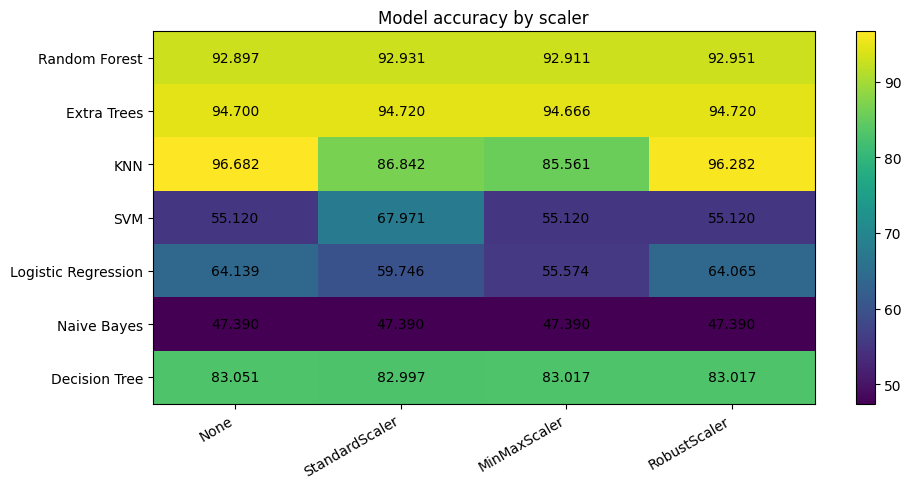

In [52]:
def run_classifiers_matrix(X=None, y=None, scalers_dict=None, cv=None, sampler=None):
    algorithms = {
        "Random Forest": run_random_forest_classifier,
        "Extra Trees": run_extra_trees_classifier,
        "KNN": run_knn_classifier,
        "SVM": run_svm_classifier,
        "Logistic Regression": run_logistic_regression_classifier,
        "Naive Bayes": run_naive_bayes_classifier,
        "Decision Tree": run_decision_tree_classifier,
    }

    matrix = pd.DataFrame(index=algorithms.keys(), columns=scalers_dict.keys(), dtype=float)

    for algo_name, algo_fn in algorithms.items():
        for scaler_name, preprocessors in scalers_dict.items():
            acc = algo_fn(X=X, y=y, preprocessors=preprocessors, sampler=sampler, cv=cv) * 100
            matrix.loc[algo_name, scaler_name] = acc

    return matrix

def plot_matrix_heatmap(df, title="Accuracy matrix"):
    data = df.values.astype(float)

    fig, ax = plt.subplots(figsize=(10, 5))
    im = ax.imshow(data, aspect="auto") 

    ax.set_title(title)
    ax.set_xticks(np.arange(df.shape[1]))
    ax.set_yticks(np.arange(df.shape[0]))
    ax.set_xticklabels(df.columns, rotation=30, ha="right")
    ax.set_yticklabels(df.index)

    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            val = data[i, j]
            txt = "NA" if np.isnan(val) else f"{val:.3f}"
            ax.text(j, i, txt, ha="center", va="center")

    fig.colorbar(im, ax=ax)
    plt.tight_layout()
    plt.show()
    
scalers = {
    "None": [],
    "StandardScaler": [StandardScaler()],
    "MinMaxScaler": [MinMaxScaler()],   
    "RobustScaler": [RobustScaler()],
}

acc_matrix_baseline = run_classifiers_matrix(
    X=X, y=y,  
    scalers_dict=scalers,
    cv=5    
)
plot_matrix_heatmap(acc_matrix_baseline, title="Model accuracy by scaler")


Zaključci:
KNN bez standardizacije daje najbolje rezultate.
Nakon njega je Extra Trees koji najbolje rezultate daje sa MinMax skalarom. Extra Trees daje slične rezultate sa skaliranjem i bez. Knn ima slične vrednosti bez skalara i sa Robust scaler-om.  Svi ostali algoritmi daju poprilično niže vrednosti.

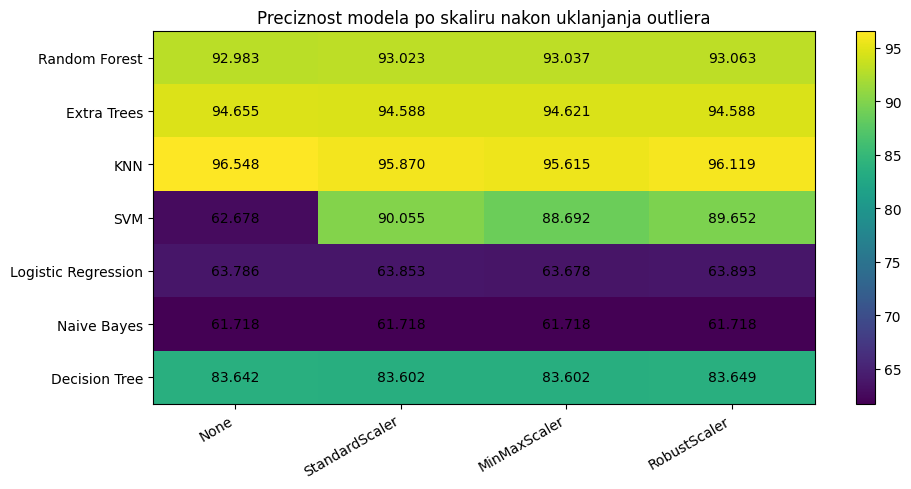

In [53]:
df_no_outliers = df[~zscore_mask]

y_no_outliers = df_no_outliers['eyeDetection']

X_no_outliers = df_no_outliers.drop(
    ['eyeDetection'],
    axis=1
)

scalers = {
    "None": [],
    "StandardScaler": [StandardScaler()],
    "MinMaxScaler": [MinMaxScaler()],
    "RobustScaler": [RobustScaler()],
}

acc_matrix_no_outliers = run_classifiers_matrix(X=X_no_outliers, y=y_no_outliers, scalers_dict=scalers, cv=5)
plot_matrix_heatmap(acc_matrix_no_outliers, title="Preciznost modela po skaliru nakon uklanjanja outliera")

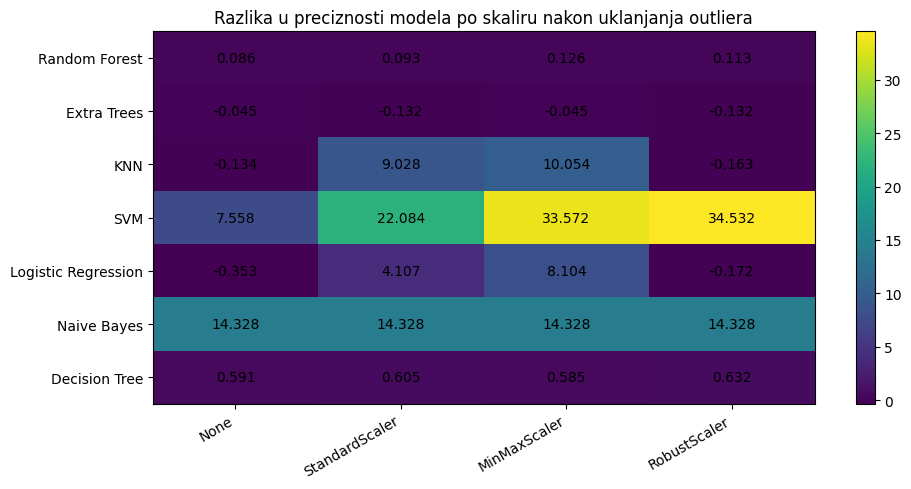

In [54]:
plot_matrix_heatmap(acc_matrix_no_outliers - acc_matrix_baseline, title="Razlika u preciznosti modela po skaliru nakon uklanjanja outliera")

Uticaj skaliranja i uklanjanja outliera značajno zavisi od tipa algoritma, ali i od dataset-a.

Tree-based algoritmi, kao što su Extra Trees, Random Forest i Decision Tree, ostvaruju najbolje i najstabilnije rezultate kada se outlieri zadrže u podacima, pri čemu skaliranje ima vrlo mali ili zanemarljiv uticaj. Ovo ukazuje na to da ekstremne vrednosti u EEG signalima često predstavljaju korisnu informaciju, a ne šum, i da ih ovi algoritmi uspešno koriste prilikom donošenja odluka.

Kod KNN algoritma, koji se zasniva na merenju udaljenosti između uzoraka, primećeno je da uklanjanje outliera i primena skaliranja mogu poboljšati rezultate, ali i da u pojedinim slučajevima model bez uklanjanja outliera i bez skaliranja daje najbolju ukupnu tačnost, što dodatno potvrđuje da originalne amplitude EEG signala nose bitnu informaciju.

Linearni modeli, kao što su SVM i Logistic Regression, najviše zavise od skaliranja i uklanjanja outliera, ali i pored toga njihovi rezultati ostaju slabiji u poređenju sa tree-based i KNN modelima. Naive Bayes pokazuje minimalnu osetljivost na obe obrade, ali postiže znatno nižu tačnost u odnosu na ostale algoritme.

Zaključak:

Uklanjanje outlier-a nije dovelo do poboljšanja preciznosti najboljih modela. KNN sa outlier-ima daje najbolje rezultate, kao i Extra Trees sa MinMax Skalarom.

Iz matrice se može videti da je doslo do značajnog poboljšanja SVM-a, ali nije blizu KNN i Extra Trees. Preciznost kod Decision Tree i KNN je opala.

### Balansiranje

S obzirom da uklanjanje outlier-a nije dovelo do poboljšanja preciznosti, zadržaćemo dataset sa outlier-ima. Ovo može da ima smisla jer fičeri predstavljaju signale.

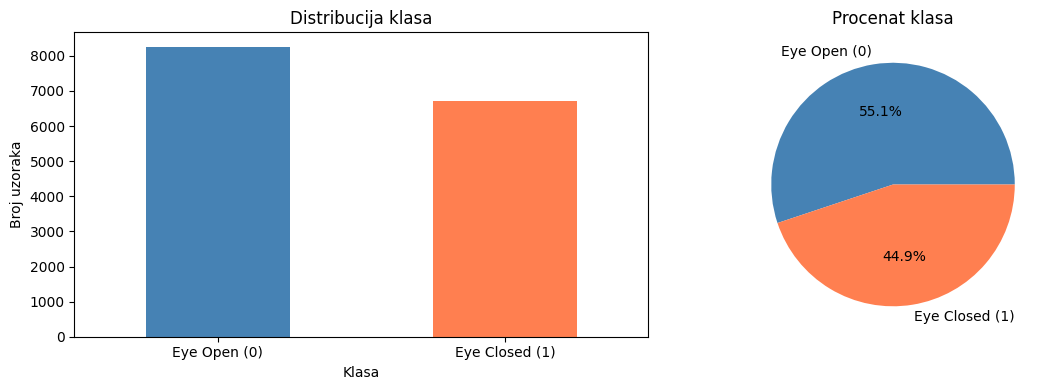

Imbalance ratio: 1.23:1


In [55]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

y.value_counts().plot(kind='bar', ax=ax[0], color=['steelblue', 'coral'])
ax[0].set_title('Distribucija klasa')
ax[0].set_xlabel('Klasa')
ax[0].set_ylabel('Broj uzoraka')
ax[0].set_xticklabels(['Eye Open (0)', 'Eye Closed (1)'], rotation=0)

y.value_counts().plot(kind='pie', ax=ax[1], autopct='%1.1f%%', 
                                         labels=['Eye Open (0)', 'Eye Closed (1)'],
                                         colors=['steelblue', 'coral'])
ax[1].set_title('Procenat klasa')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

imbalance_ratio = y.value_counts().max() / y.value_counts().min()
print(f"Imbalance ratio: {imbalance_ratio:.2f}:1")

#### Metode balansiranja

Isprobane su sledeće metode balansiranja:

1. **Random Oversampling** - duplikacija manjinske klase
2. **Random Undersampling** - smanjenje većinske klase
3. **SMOTE** - generisanje sintetičkih uzoraka manjinske klase
4. **ADASYN** - adaptivno generisanje sintetičkih uzoraka
5. **SMOTETomek** - kombinacija SMOTE i Tomek links
6. **SMOTEENN** - kombinacija SMOTE i Edited Nearest Neighbours

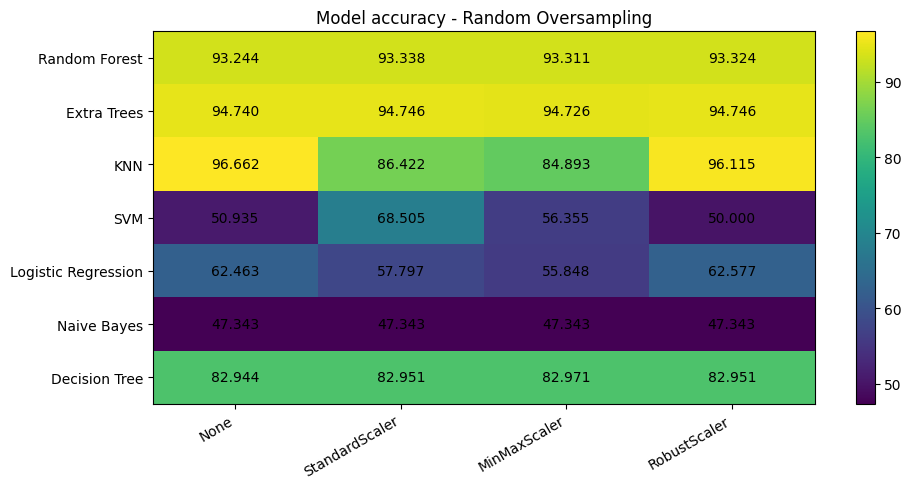

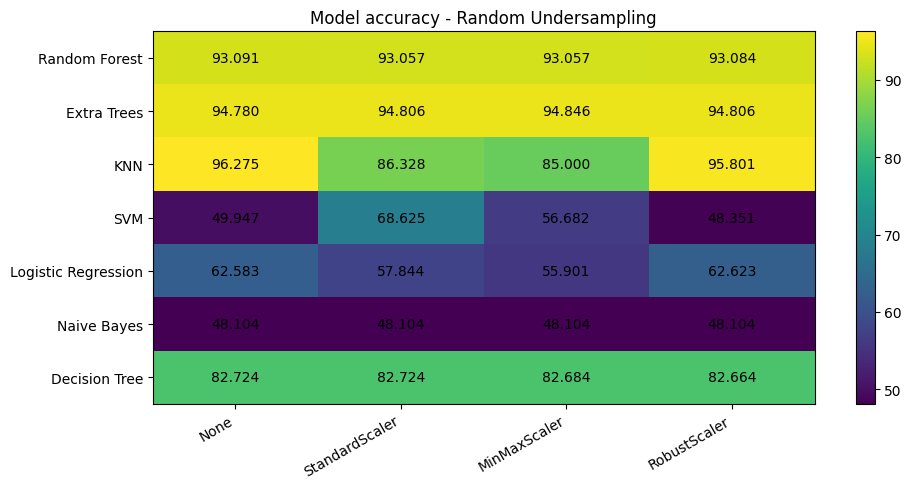

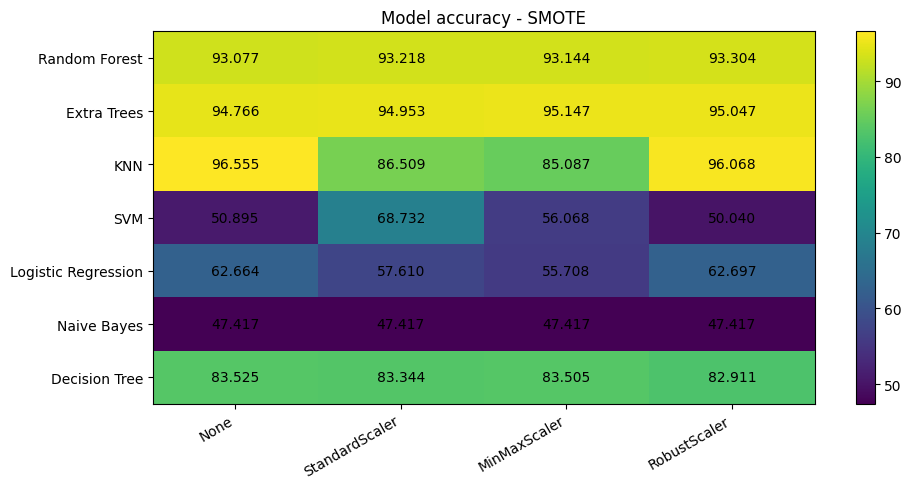

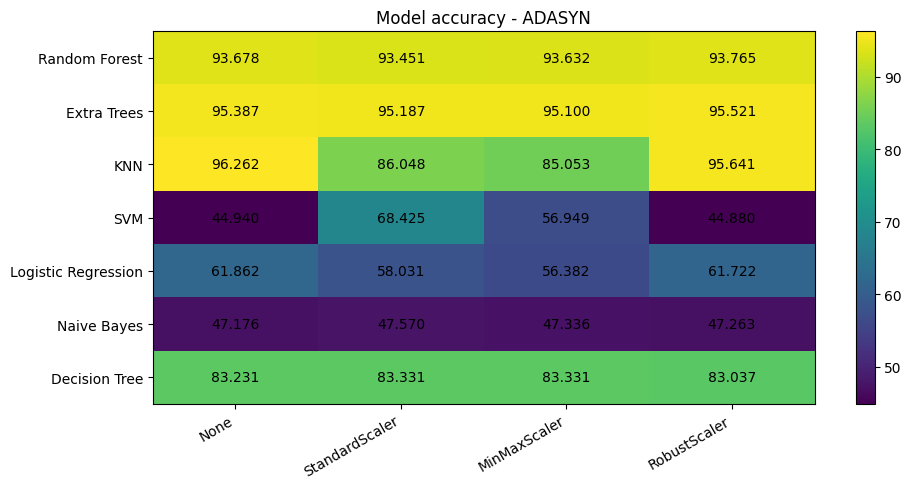

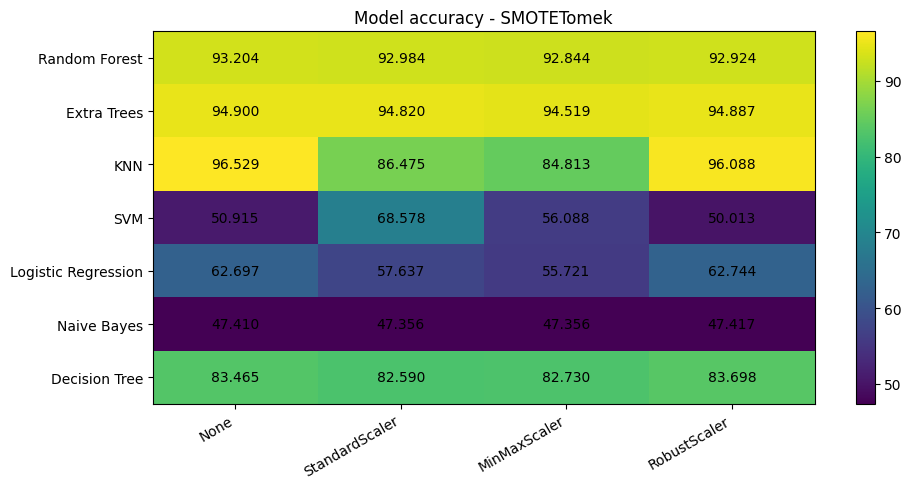

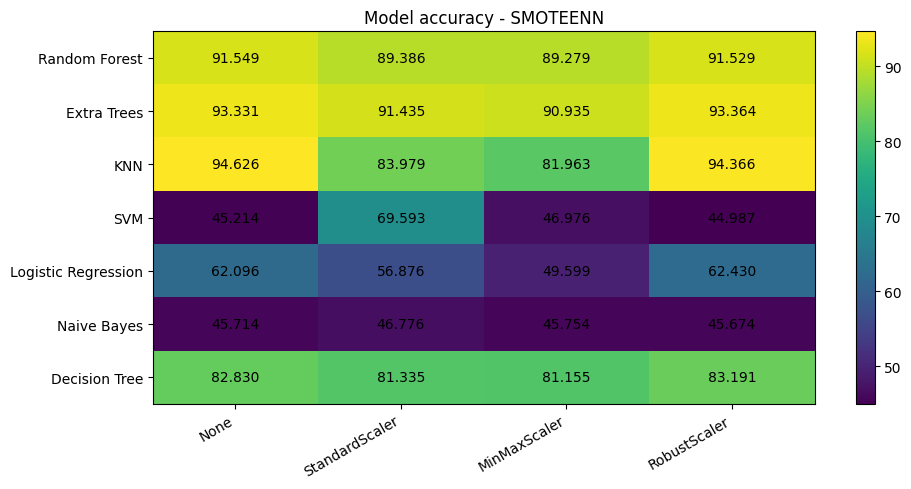

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN

def evaluate_balancing_methods(X=None, y=None, cv=None):
    balancing_methods = {
        "Random Oversampling": RandomOverSampler(random_state=42),
        "Random Undersampling": RandomUnderSampler(random_state=42),
        "SMOTE": SMOTE(random_state=42),
        "ADASYN": ADASYN(random_state=42),
        "SMOTETomek": SMOTETomek(random_state=42),
        "SMOTEENN": SMOTEENN(random_state=42)
    }
    
    results = []
    balanced_datasets = {}
    
    for method_name, sampler in balancing_methods.items():
        balanced_datasets[method_name] = (X, y)
            
        res = run_classifiers_matrix(
                X=X,
                y=y,
                scalers_dict=scalers,
                sampler=sampler,
                cv=cv
        )
            
        plot_matrix_heatmap(res, title="Model accuracy - " + method_name)
        results.append({
            "Balancing Method": method_name,
            "Accuracy Matrix": res
        })
    
    return pd.DataFrame(results), balanced_datasets

balancing_results, balanced_datasets = evaluate_balancing_methods(
    X=X,
    y=y,
    cv=5
)

Nakon primenjenih metoda za balansiranje možemo uočiti sledeće:

Prilikom korišćenja ADASYN balansera došlo je do malog poboljšanja kod ExtraTrees modela, međutim došlo je do sličnog opadanja kod KNN-a.
Naš dataset je poprilično izablansiran bez primena ovih metoda, tako da su ovakvi rezultati i očekivani.

 Odlučili smo da ostavimo originalan dataset jer dolazi do malog povecanja drugog najboljeg modela i sličnog smanjena kod prvog najboljeg.

### Uklanjanje visoko korelisanih feature-a

Na osnovu ranije analize korelacije, uklanjamo redundantne feature-e koji imaju korelaciju > 0.95.

In [58]:
def run_extra_trees(X, y, cv):
    return run_extra_trees_classifier([MinMaxScaler()], X, y, cv) * 100

def run_knn(X, y, cv):
    return run_knn_classifier([], X, y, cv) * 100

In [59]:
import itertools
import numpy as np
import pandas as pd

def get_high_corr_pairs(df: pd.DataFrame, threshold: float = 0.9):
    corr = df.corr().abs()
    cols = list(corr.columns)

    pairs = []
    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            v = corr.iloc[i, j]
            if v > threshold:
                pairs.append((cols[i], cols[j], float(v)))
    return pairs

def evaluate_hight_corr_drops2(X, y, pairs, max_drop=5, cv=5):
    all_corr_cols = set()
    for col_a, col_b, _ in pairs:
        all_corr_cols.add(col_a)
        all_corr_cols.add(col_b)
    
    all_corr_cols = list(all_corr_cols)
    
    knn_results = []
    xtra_trees_results = []
    
    for num_to_drop in range(1, min(max_drop + 1, len(all_corr_cols) + 1)):
        combinations = itertools.combinations(all_corr_cols, num_to_drop)
        
        for drop_set in combinations:
            drop_set = list(drop_set)
            X_reduced = X.drop(columns=drop_set)

            knn_result = run_knn(X_reduced, y, cv)
            knn_results.append({
                "Dropped Columns": drop_set,
                "Num Dropped": len(drop_set),
                "Accuracy (%)": knn_result,
                "Remaining Features": X_reduced.shape[1],
            })

            xtra_trees_result = run_extra_trees(X_reduced, y, cv)
            xtra_trees_results.append({
                "Dropped Columns": drop_set,
                "Num Dropped": len(drop_set),
                "Accuracy (%)": xtra_trees_result,
                "Remaining Features": X_reduced.shape[1],
            })
    
    knn_results_df = pd.DataFrame(knn_results)
    knn_results_df = knn_results_df.sort_values(by="Accuracy (%)", ascending=False)
    
    xtra_trees_results_df = pd.DataFrame(xtra_trees_results)
    xtra_trees_results_df = xtra_trees_results_df.sort_values(by="Accuracy (%)", ascending=False)

    print("KNN")
    print(f"\nUkupno varijanti: {len(knn_results_df)}")
    print("\nTop 10 najboljih kombinacija:")
    print(knn_results_df.head(10).to_string(index=False))

    print("Extra Trees")
    print(f"\nUkupno varijanti: {len(xtra_trees_results_df)}")
    print("\nTop 10 najboljih kombinacija:")
    print(xtra_trees_results_df.head(10).to_string(index=False))

pairs = get_high_corr_pairs(X, threshold=0.95)
evaluate_hight_corr_drops2(X, y, pairs, 5)

KNN

Ukupno varijanti: 119

Top 10 najboljih kombinacija:
Dropped Columns  Num Dropped  Accuracy (%)  Remaining Features
           [P8]            1     96.755674                  13
      [AF4, P8]            2     96.428571                  12
      [FC5, P8]            2     96.368491                  12
          [AF4]            1     96.234980                  13
      [AF3, P8]            2     96.221629                  12
          [FC5]            1     96.148198                  13
       [P8, P7]            2     96.081442                  12
           [P7]            1     96.068091                  13
       [F8, P8]            2     96.028037                  12
          [AF3]            1     95.974633                  13
Extra Trees

Ukupno varijanti: 119

Top 10 najboljih kombinacija:
Dropped Columns  Num Dropped  Accuracy (%)  Remaining Features
           [P8]            1     94.893191                  13
       [P8, P7]            2     94.519359               

Može se primetiti da bi izbacivanje kolone P8 poboljšalo rezultate i KNN i Xtra Trees algoritma, pa ćemo tu kolonu izbaciti jer je visoko korelisana sa AF3 i F8.

In [60]:
X_no_P8 = X.drop(columns=['P8'])

### Redukcija dimenzionalnosti (PCA)

Primenjujemo PCA (Principal Component Analysis) za redukciju dimenzionalnosti sa zadržavanjem 95% varijanse.

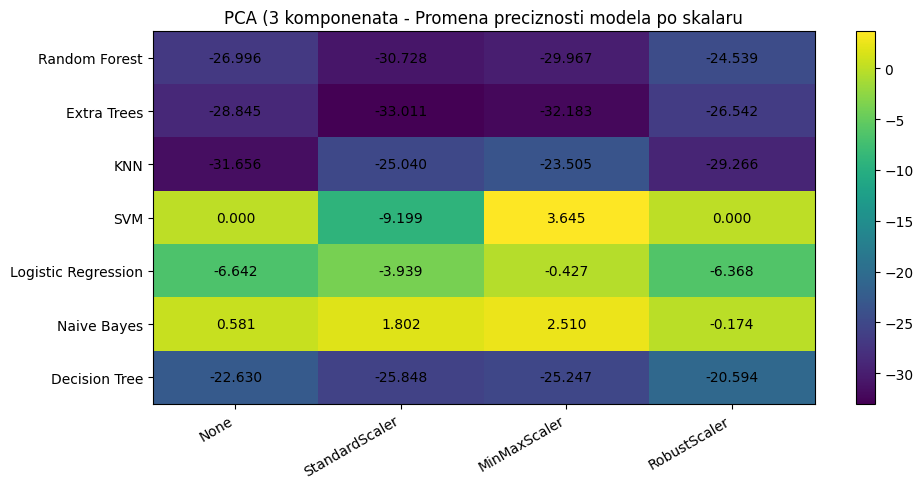

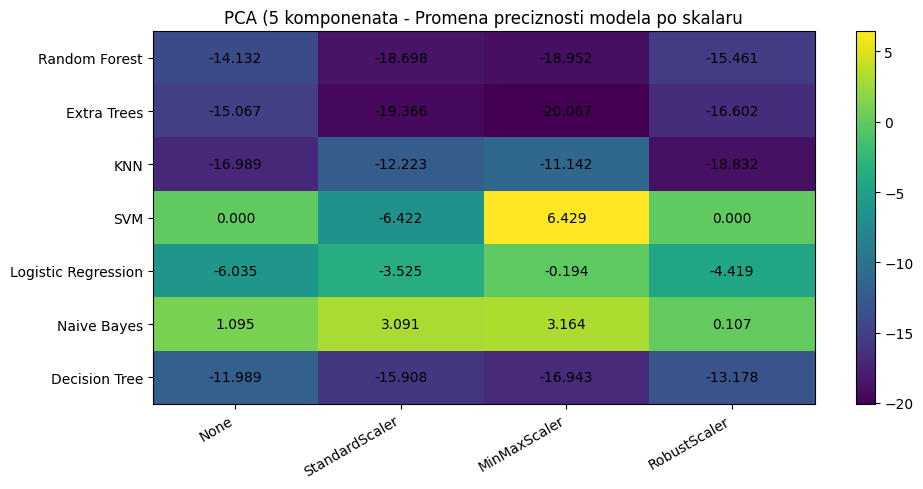

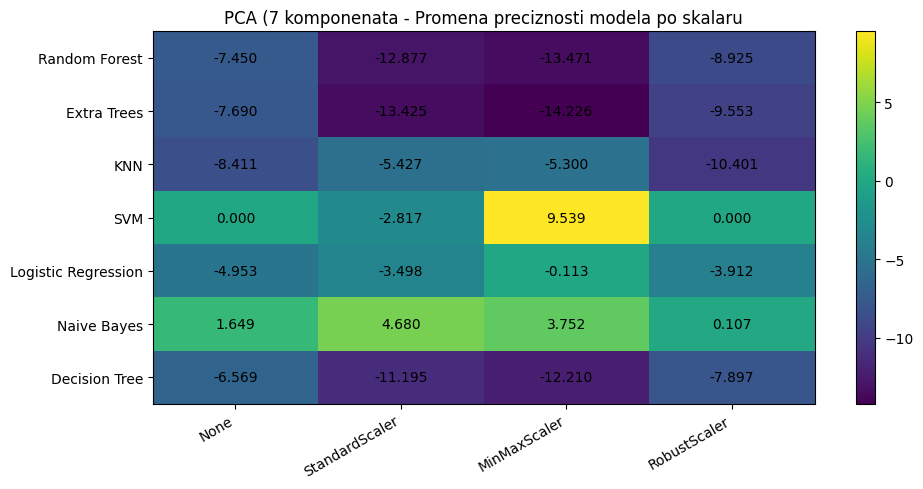

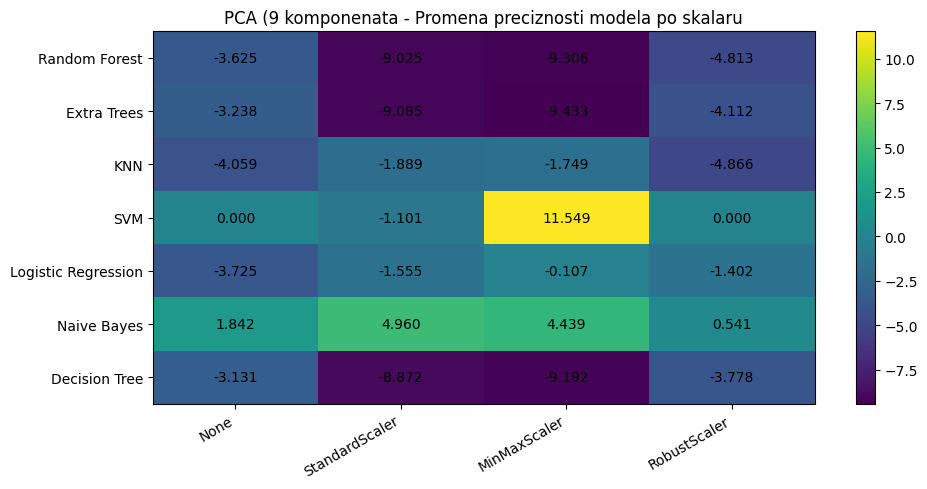

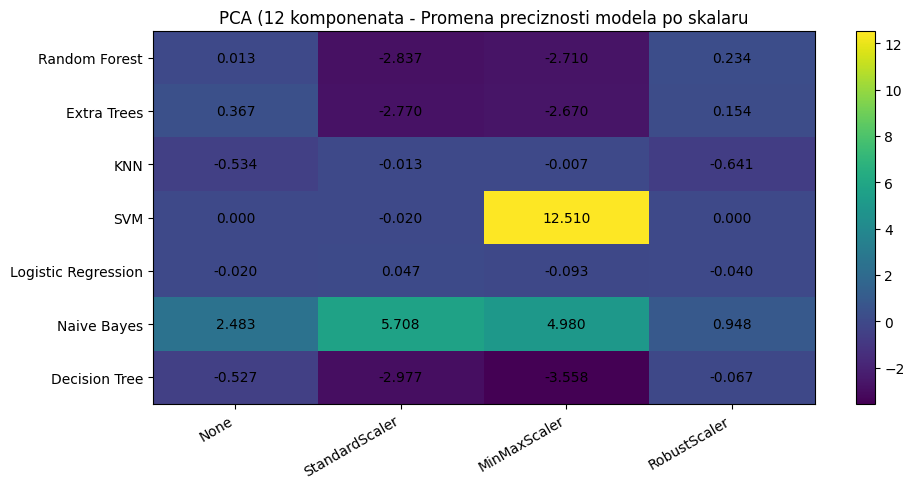

In [61]:
pca_results = []

for n_components in [3, 5, 7, 9, 12]:
    pca = PCA(n_components=n_components)

    scalers_with_pca = {
        scaler_name: (preprocessors + [PCA(n_components=n_components, random_state=42)])
        for scaler_name, preprocessors in scalers.items()
    }

    res = run_classifiers_matrix(X=X_no_P8, y=y, scalers_dict=scalers_with_pca, cv=5)
    plot_matrix_heatmap(res - run_classifiers_matrix(X=X_no_P8, y=y, scalers_dict=scalers, cv=5), title=f"PCA ({n_components} komponenata - Promena preciznosti modela po skalaru")

    pca_results.append({
        "n_components": n_components,
        "accuracy": res
    })

Iz prilozenog mozemo videti da preciznost znatno opada za KNN i ExtraTrees koji su nam do sada pokazali najbolje rezultate kao i za vecinu ostalih. Znatno poboljsanje vidmo za SVM algoritam kada se koristi i MinMaxScaler

## Optimizacija hiperparametara

In [58]:
X_train_no_P8, X_test_no_P8, y_train_no_P8, y_test_no_P8 = train_test_split(
    X_no_P8, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
print("\n--- Extra Trees optimizacija ---")

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("model", ExtraTreesClassifier(
        random_state=42,
        class_weight="balanced",
        n_jobs=-1
    ))
])

param_dist = {
    "model__n_estimators": [100, 200, 300, 500, 800],
    "model__max_depth": [None, 10, 20, 30],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["sqrt", "log2", None], 
    "model__criterion": ["gini", "entropy"],
    "model__bootstrap": [False, True],               
}

search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=50,                       
    scoring="accuracy",      
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_no_P8, y)

print("Najbolji parametri:", search.best_params_)
print(f"Najbolja CV accuracy: {search.best_score_ * 100:.2f}%")

extra_trees_best = search.best_estimator_

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

baseline_pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("model", ExtraTreesClassifier(
        random_state=42,
        class_weight="balanced",
        n_jobs=-1
    ))
])

base = report("baseline", baseline_pipe, X_no_P8, y, cv=5)["accuracy"] * 100
tuned = report("tuned", extra_trees_best, X_no_P8, y, cv=5)["accuracy"] * 100

print(f"no P8: {base:.3f}%")
print(f"tuned:    {tuned:.3f}%")
print(f"delta:    {tuned - base:+.3f} pp")



--- Extra Trees optimizacija ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Najbolji parametri: {'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': None, 'model__max_depth': None, 'model__criterion': 'entropy', 'model__bootstrap': False}
Najbolja CV balanced accuracy: 94.93%
baseline: 94.887%
tuned:    94.933%
delta:    +0.047 pp


In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

print("\n--- KNN optimizacija ---")


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipe_knn = Pipeline([
    ("model", KNeighborsClassifier())
])

param_dist_knn = {
    "model__n_neighbors": list(range(3, 51, 2)),  
    "model__weights": ["uniform", "distance"],
    "model__p": [1, 2],  # 1=Manhattan, 2=Euclidean
}

search_knn = RandomizedSearchCV(
    estimator=pipe_knn,
    param_distributions=param_dist_knn,
    n_iter=30,
    scoring="accuracy",     
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search_knn.fit(X_no_P8, y)

print("Najbolji KNN parametri:", search_knn.best_params_)
print(f"Najbolja CV accuracy: {search_knn.best_score_ * 100:.2f}%")

knn_best_no_sc = search_knn.best_estimator_

from sklearn.pipeline import Pipeline

baseline_knn_no_sc = Pipeline([
    ("model", KNeighborsClassifier())
])

base_knn_no_sc = report("baseline_knn", baseline_knn_no_sc, X_no_P8, y, cv=5)["accuracy"] * 100
tuned_knn_no_sc = report("tuned_knn", knn_best_no_sc, X_no_P8, y, cv=5)["accuracy"] * 100

print(f"KNN no p8: {base_knn_no_sc:.3f}%")
print(f"KNN tuned:    {tuned_knn_no_sc:.3f}%")
print(f"KNN delta:    {tuned_knn_no_sc - base_knn_no_sc:+.3f} pp")


--- KNN optimizacija ---
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Najbolji KNN parametri: {'model__weights': 'uniform', 'model__p': 1, 'model__n_neighbors': 3}
Najbolja CV accuracy: 97.03%
KNN baseline: 96.756%
KNN tuned:    97.029%
KNN delta:    +0.274 pp




--- Promena u odnosu na baseline (pp) ---
      Model  Promena (pp)
Extra Trees         0.047
        KNN         0.274


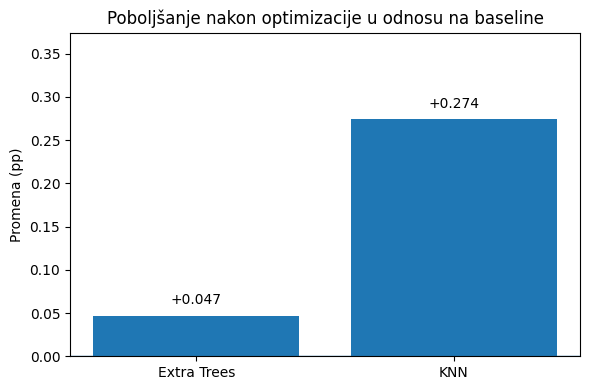

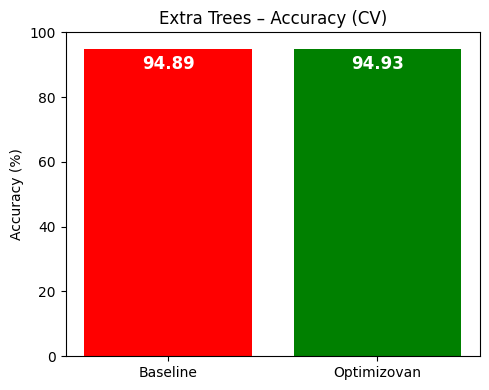

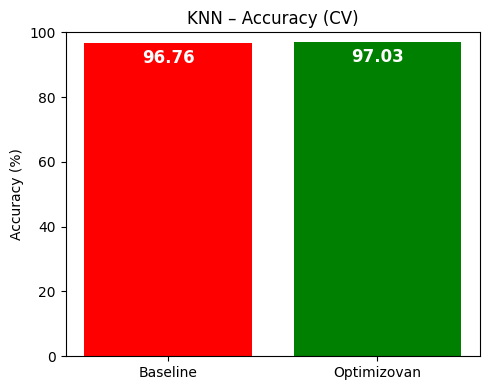

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

delta_et = tuned - base
delta_knn = tuned_knn_no_sc - base_knn_no_sc

delta_df = pd.DataFrame([
    {"Model": "Extra Trees", "Promena (pp)": round(delta_et, 3)},
    {"Model": "KNN",         "Promena (pp)": round(delta_knn, 3)}
])

print("\n--- Promena u odnosu na dataset bez P8 (pp) ---")
print(delta_df.to_string(index=False))

# Plot promena
plt.figure(figsize=(6, 4))
x = np.arange(len(delta_df))
bars = plt.bar(x, delta_df["Promena (pp)"])

plt.axhline(0, linewidth=1)
plt.ylabel("Promena (pp)")
plt.title("Poboljšanje nakon optimizacije u odnosu na dataset bez P8")
plt.xticks(x, delta_df["Model"])

plt.ylim(0, delta_df["Promena (pp)"].max() + 0.1)

for bar in bars:
    h = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        h + 0.01,          
        f"{h:+.3f}",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.tight_layout()
plt.show()

# Extra Trees plot
import matplotlib.pyplot as plt

et_values = {
    "No P8": base,
    "Optimizovan": tuned
}

labels = list(et_values.keys())
values = list(et_values.values())

max_val = max(values)
colors = ["green" if v == max_val else "red" for v in values]

plt.figure(figsize=(5, 4))
bars = plt.bar(labels, values, color=colors)

plt.title("Extra Trees – Accuracy (CV)")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)

for bar in bars:
    h = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        h - 2,                 
        f"{h:.2f}",
        ha="center",
        va="top",
        fontsize=12,
        color="white",        
        fontweight="bold"
    )

plt.tight_layout()
plt.show()

knn_values = {
    "No P8": base_knn_no_sc,
    "Optimizovan": tuned_knn_no_sc
}

labels = list(knn_values.keys())
values = list(knn_values.values())

max_val = max(values)
colors = ["green" if v == max_val else "red" for v in values]

plt.figure(figsize=(5, 4))
bars = plt.bar(labels, values, color=colors)

plt.title("KNN – Accuracy (CV)")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)

for bar in bars:
    h = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        h - 2,
        f"{h:.2f}",
        ha="center",
        va="top",
        fontsize=12,
        color="white",
        fontweight="bold"
    )

plt.tight_layout()
plt.show()




## Analiza interpretabilnosti modela

U ovom delu analiziramo interpretabilnost modela koristeći:
- **Feature Importance** - značaj feature-a u tree-based modelima
- **SHAP vrednosti** - SHapley Additive exPlanations
- **LIME** - Local Interpretable Model-agnostic Explanations

### Feature Importance (Knn & Extra Trees)

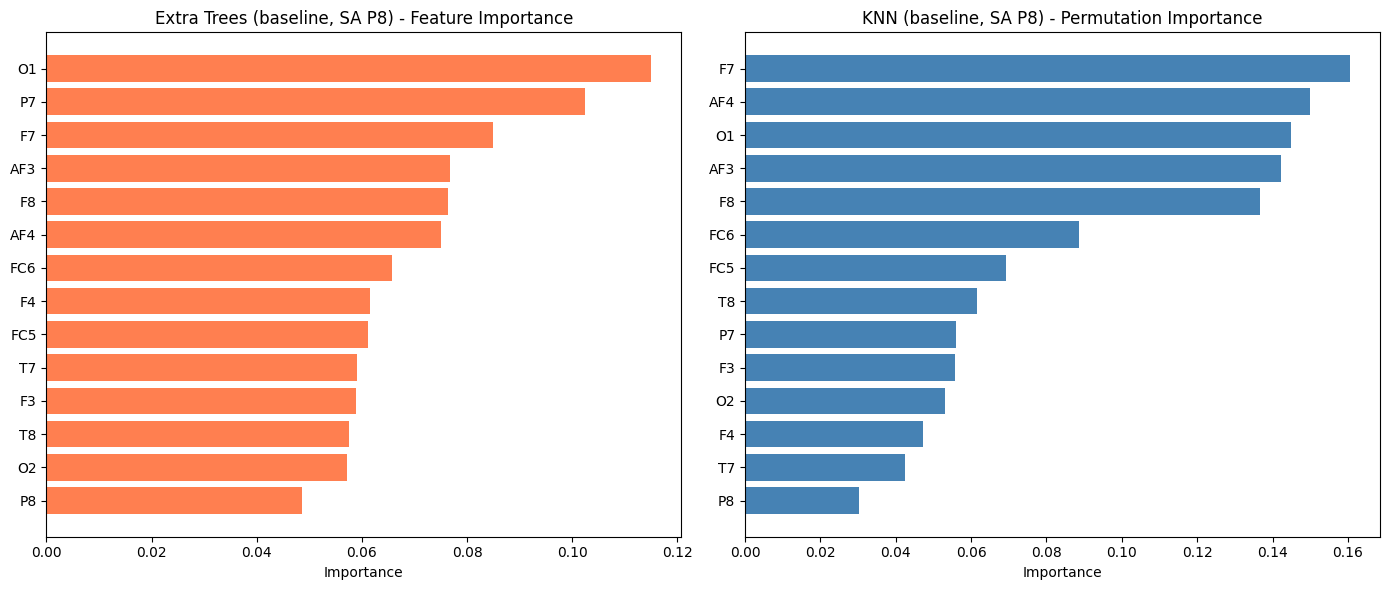


Top 5 (Extra Trees, SA P8):
Feature  Importance
     O1    0.114974
     P7    0.102416
     F7    0.084931
    AF3    0.076808
     F8    0.076380

Top 5 (KNN, SA P8):
Feature  Importance
     F7    0.160487
    AF4    0.149920
     O1    0.144953
    AF3    0.142176
     F8    0.136562


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

def make_baseline_et():
    return Pipeline([
        ("scaler", MinMaxScaler()),
        ("model", ExtraTreesClassifier(
            random_state=42,
            class_weight="balanced",
            n_jobs=-1
        ))
    ])

def make_baseline_knn():
    return Pipeline([
        ("model", KNeighborsClassifier())
    ])

et_p8 = make_baseline_et().fit(X, y)
knn_p8 = make_baseline_knn().fit(X, y)


# Feature importance: ET (ugradjeno) + KNN (permutation)


feature_names_p8 = X.columns.tolist()

et_importance_p8 = pd.DataFrame({
    "Feature": feature_names_p8,
    "Importance": et_p8.named_steps["model"].feature_importances_
}).sort_values("Importance", ascending=False)

perm_p8 = permutation_importance(
    knn_p8, X, y,
    n_repeats=10,
    random_state=42,
    n_jobs=-1,
    scoring="accuracy"
)

knn_importance_p8 = pd.DataFrame({
    "Feature": feature_names_p8,
    "Importance": perm_p8.importances_mean
}).sort_values("Importance", ascending=False)



fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].barh(et_importance_p8["Feature"],
             et_importance_p8["Importance"],
             color="coral")
axes[0].set_xlabel("Importance")
axes[0].set_title("Extra Trees (baseline, SA P8) - Feature Importance")
axes[0].invert_yaxis()

axes[1].barh(knn_importance_p8["Feature"],
             knn_importance_p8["Importance"],
             color="steelblue")
axes[1].set_xlabel("Importance")
axes[1].set_title("KNN (baseline, SA P8) - Permutation Importance")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\nTop 5 (Extra Trees, SA P8):")
print(et_importance_p8.head(5).to_string(index=False))
print("\nTop 5 (KNN, SA P8):")
print(knn_importance_p8.head(5).to_string(index=False))

Na osnovu početne analize korelacije između EEG kanala, kolona P8 je identifikovana kao jedna od najmanje informativnih i kao deo grupe visoko korelisanih atributa, zbog čega je uklonjena iz daljeg razmatranja. Odluka o izbacivanju ove kolone dodatno je potvrđena analizom značaja atributa dobijenom pomoću feature importance metoda.

Pored toga, primećeno je da EEG kanali iz okcipitalne i frontalne regije, kao što su O1, F7, AF3 i AF4, imaju najveći značaj u oba modela, što je u skladu sa fiziološkim očekivanjima, s obzirom na to da su ove regije direktno povezane sa vizuelnom obradom i pažnjom. Ovo potvrđuje da je početna analiza strukture podataka i fiziološkog značenja kanala bila ispravna.

### SHAP Analiza (SHapley Additive exPlanations)

SHAP vrednosti pokazuju doprinos svakog feature-a predikciji modela.

ExtraTrees lokalni uzorci (idx): [0, 83, 5249]
KNN lokalni uzorci (idx): [0, 870, 188]


<Figure size 1000x500 with 0 Axes>

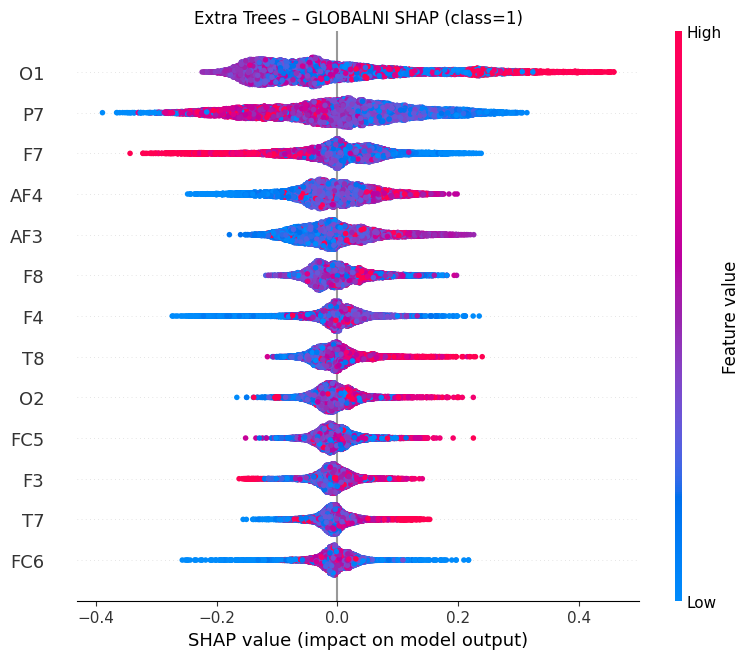

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap

X_int = X_no_P8
y_int = y
feature_names = X_int.columns.tolist()
knn_model = knn_best_no_sc

def pick_cases(estimator, X, y):
    y_pred = estimator.predict(X)

    correct_candidates = np.where(y_pred == y)[0]
    correct_idx = int(correct_candidates[0]) if len(correct_candidates) else 0

    wrong_candidates = np.where(y_pred != y)[0]
    wrong_idx = int(wrong_candidates[0]) if len(wrong_candidates) else correct_idx

    if hasattr(estimator, "predict_proba"):
        proba = estimator.predict_proba(X)
        p = proba[:, 1]
        border_idx = int(np.argmin(np.abs(p - 0.5)))
    else:
        border_idx = correct_idx

    return [correct_idx, wrong_idx, border_idx]

idx_list_et = pick_cases(extra_trees_best, X_int, y_int)
idx_list_knn = pick_cases(knn_model, X_int, y_int)

print("ExtraTrees lokalni uzorci (idx):", idx_list_et)
print("KNN lokalni uzorci (idx):", idx_list_knn)

X_cases_et = X_int.iloc[idx_list_et]
X_cases_knn = X_int.iloc[idx_list_knn]

pipe_et = extra_trees_best
model_et = pipe_et.named_steps["model"]
scaler_et = pipe_et.named_steps.get("scaler", None)

if scaler_et is not None:
    X_et_t = pd.DataFrame(scaler_et.transform(X_int), columns=feature_names)
    X_cases_et_t = pd.DataFrame(scaler_et.transform(X_cases_et), columns=feature_names)
else:
    X_et_t = X_int.copy()
    X_cases_et_t = X_cases_et.copy()

explainer_et = shap.TreeExplainer(model_et)
shap_vals_et = explainer_et(X_et_t)

plt.figure(figsize=(12, 7))
shap.summary_plot(
    shap_vals_et[:, :, 1], 
    X_et_t,
    max_display=len(feature_names), 
    show=False
)
plt.title("Extra Trees – GLOBALNI SHAP (class=1)")
plt.tight_layout()
plt.show()


Na slici je prikazan globalni SHAP dijagram za Extra Trees model, gde je analiziran uticaj svih EEG kanala na predikciju klase 1 (zatvorene oči).
Na Y-osi se nalaze EEG kanali (feature-i) koji su sortirani po važnosti, dok se na X-osi nalaze SHAP vrednosti. Ako je shap vrednost pozitivna,to znaci da se predikcija gura ka yatvorenim očima, negatvna ka otvorenim a kada je oko 0 nema uticaja. Crvena i plava boja indukuju visoke i niske vrednosti signala.

ExtraTrees model najviše koristi informacije iz okcipitalnih (O1), parijetalnih (P7) i frontalnih (F7, AF3, AF4) regiona, što je logično za eye-state problem.

Uticaj ovih signala je nelinearan, jer iste vrednosti kanala mogu u različitim kombinacijama sa ostalim EEG signalima povećavati ili smanjivati verovatnoću zatvorenih očiju. Time se potvrđuje da model ne koristi pojedinačne feature-e izolovano, već u međusobnoj interakciji.


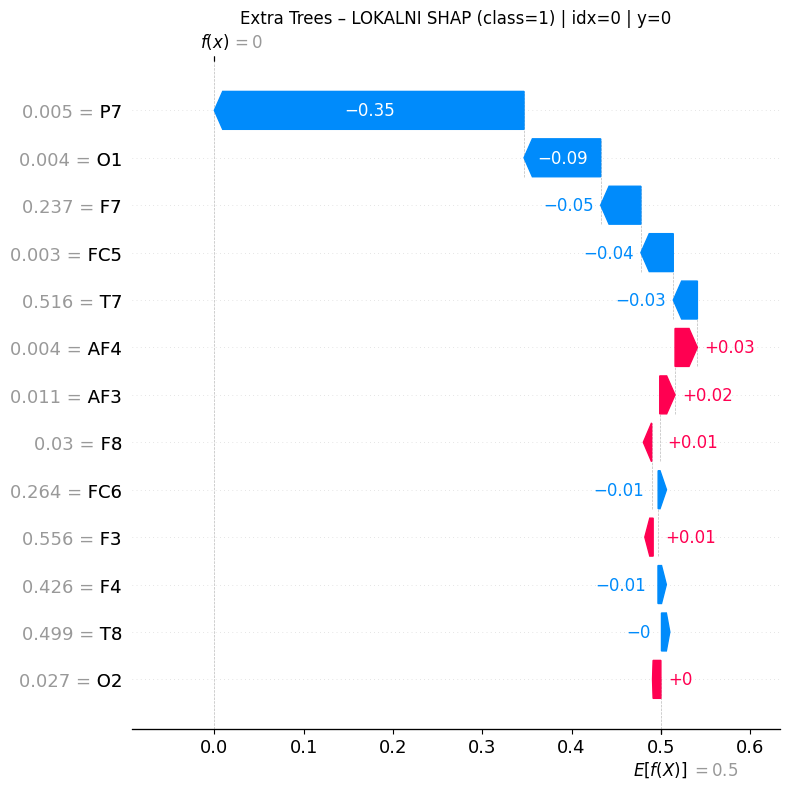


idx=0 | y=0
PROTIV klase 1: ['P7', 'O1', 'F7']
ZA klasu 1:     ['F8', 'AF3', 'AF4']


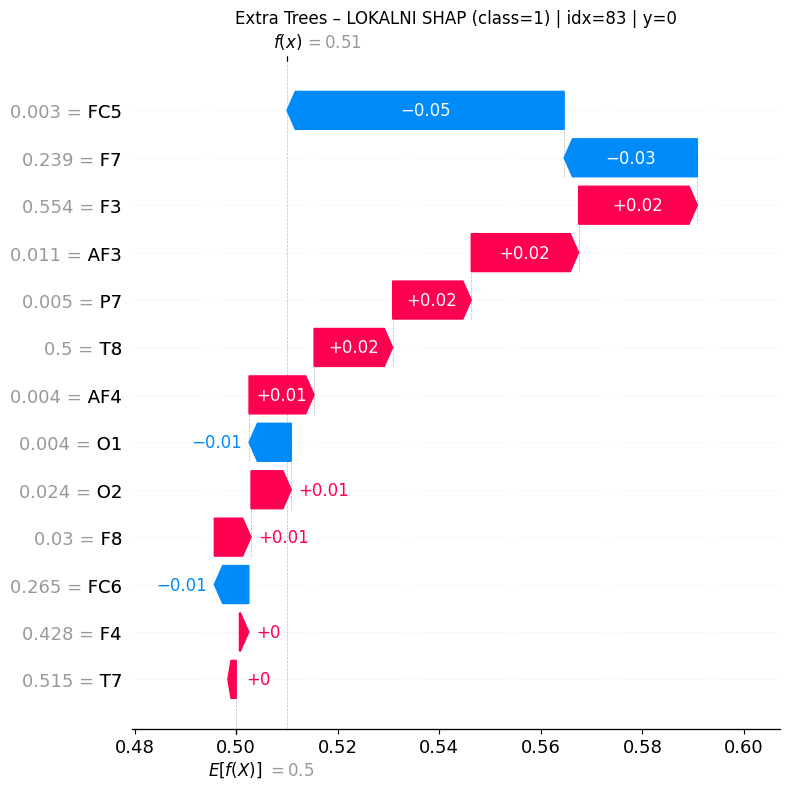


idx=83 | y=0
PROTIV klase 1: ['FC5', 'F7', 'O1']
ZA klasu 1:     ['P7', 'AF3', 'F3']


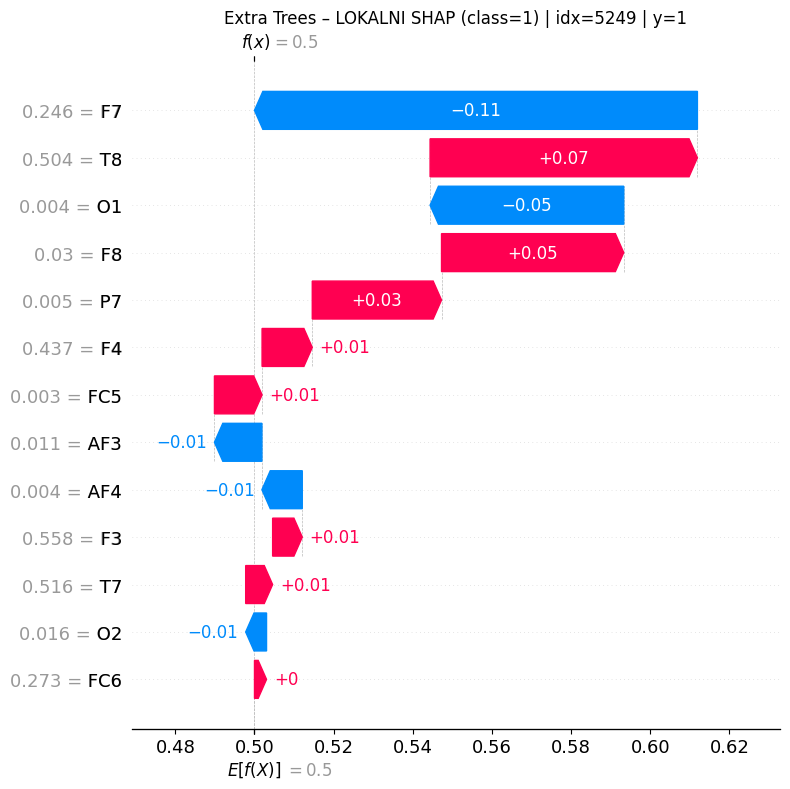


idx=5249 | y=1
PROTIV klase 1: ['F7', 'O1', 'AF3']
ZA klasu 1:     ['P7', 'F8', 'T8']


In [ ]:
for idx in idx_list_et:
    sv = shap_vals_et[idx]

    values_c1 = sv.values[:, 1]

    base_c1 = sv.base_values[1] if np.ndim(sv.base_values) > 0 else sv.base_values

    data_row = sv.data

    sv_c1 = shap.Explanation(
        values=values_c1,
        base_values=base_c1,
        data=data_row,
        feature_names=feature_names
    )

    plt.figure(figsize=(10, 5))
    shap.plots.waterfall(sv_c1, max_display=15, show=False)
    plt.title(f"Extra Trees – LOKALNI SHAP (class=1) | idx={idx} | y={y_int.iloc[idx]}")
    plt.tight_layout()
    plt.show()
    contrib = pd.Series(sv_c1.values, index=feature_names).sort_values()
    print(f"\nidx={idx} | y={y_int.iloc[idx]}")
    print("PROTIV klase 1:", list(contrib.head(3).index))
    print("ZA klasu 1:    ", list(contrib.tail(3).index))


Pogledajmo rezultate za ExtraTrees:

E[f(x)] je prosečna vrednost izlaza modela za klasu 1, tj. model ako ništa ne zna o uzorku u proseku daje vrednost 0.5 za klasu 1.

Znači, ako je vrednost f(x) = 0.51, model je predvideo da je to verovatnoća za klasu jedan u tom konkretnom slučaju.

U prvom primeru model je pogodio da su oci otvorene. Vdimo da P7 ima visoku negativnu vrednost sto jako navodi na klasu 0. O1,F7 i T7 isto. Maltene P7 i O1 su presudni signali za otvorene oči.

Drugi primer. Model je na granici. Imamo negativne FC5 i F7 sto vuce ka otvorenim očima, a visoke F3,AF3,P7 I T8 sto vuče ka yatvorenim očima. Ovakvi primeri su tipični za tranziciju između stanja (treptaj npr). U ovom slučaju model nije pogodio vrednost.

Treći primer. Model je ispravno predvideo klasu 1, ali opet na granici. T8, F8, P7 su tipični za zatvorene oči Ali F7 i O1 teže ka otvorenim.

Using 150 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


KNN lokalni uzorci (idx): [0, 870, 188]
Globalni SHAP se racuna na uzorku od 2000 instanci.


100%|██████████| 2000/2000 [46:47<00:00,  1.40s/it]


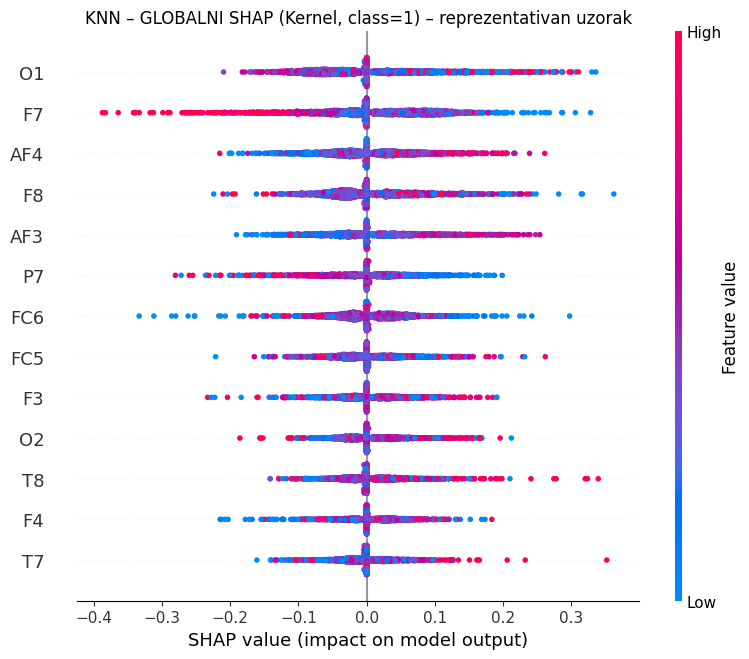

100%|██████████| 3/3 [00:05<00:00,  1.75s/it]


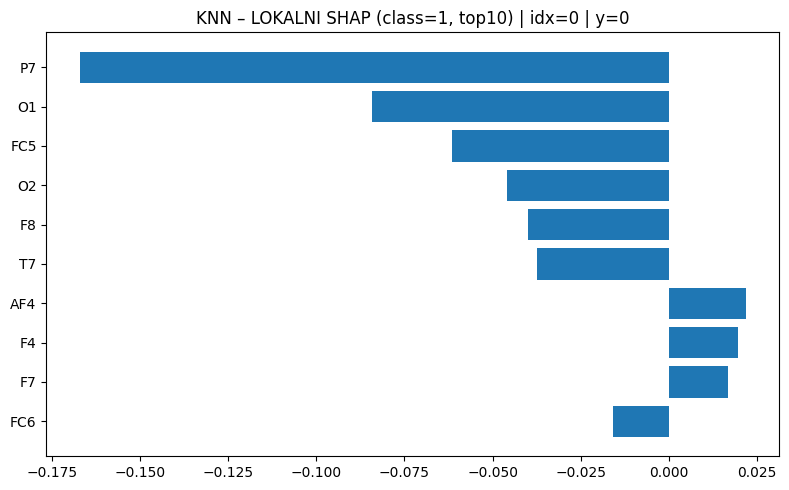


idx=0 | y=0
PROTIV klase 1: ['P7', 'O1', 'FC5']
ZA klasu 1:     ['F7', 'F4', 'AF4']


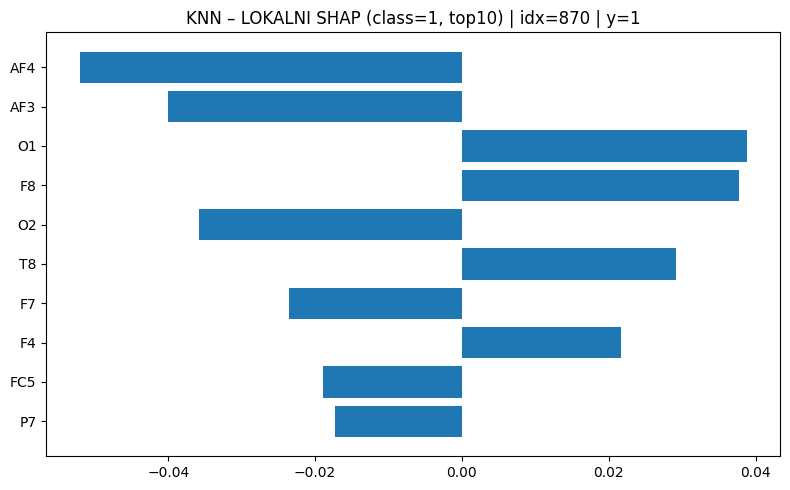


idx=870 | y=1
PROTIV klase 1: ['AF4', 'AF3', 'O2']
ZA klasu 1:     ['T8', 'F8', 'O1']


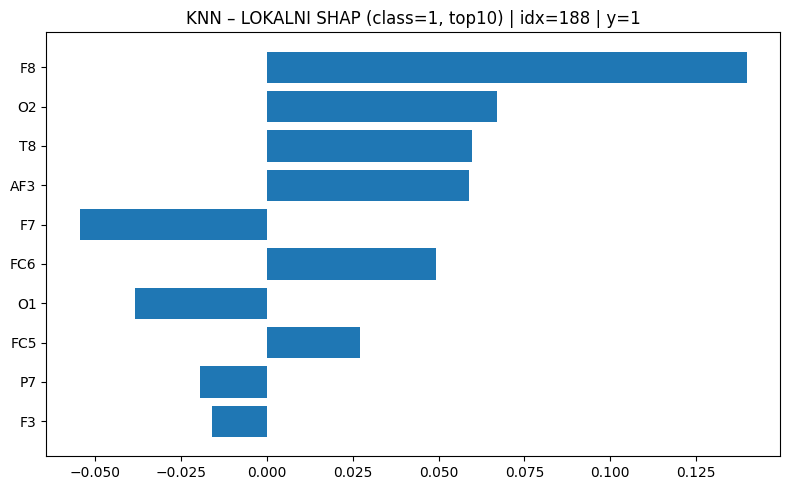


idx=188 | y=1
PROTIV klase 1: ['F7', 'O1', 'P7']
ZA klasu 1:     ['T8', 'O2', 'F8']


In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X_int = X_no_P8
y_int = y
feature_names = X_int.columns.tolist()
knn_model = knn_best_no_sc   

def pick_cases(estimator, X, y):
    y_pred = estimator.predict(X)

    correct_idx = int(np.where(y_pred == y)[0][0]) if np.any(y_pred == y) else 0
    wrong_idx = int(np.where(y_pred != y)[0][0]) if np.any(y_pred != y) else correct_idx

    p = estimator.predict_proba(X)[:, 1]
    border_idx = int(np.argmin(np.abs(p - 0.5)))

    return [correct_idx, wrong_idx, border_idx]

idx_list_knn = pick_cases(knn_model, X_int, y_int)
print("KNN lokalni uzorci (idx):", idx_list_knn)

X_local = X_int.iloc[idx_list_knn]


n_global = min(2000, len(X_int))
X_global = X_int.sample(n=n_global, random_state=42)

print(f"Globalni SHAP se racuna na uzorku od {len(X_global)} instanci.")


n_background = min(150, len(X_int))
background = X_int.sample(n=n_background, random_state=42)

def f_knn(data_np):
    return knn_model.predict_proba(pd.DataFrame(data_np, columns=feature_names))

explainer = shap.KernelExplainer(f_knn, background)


def shap_class1_matrix(shap_vals):
    if isinstance(shap_vals, list):
        vals = np.array(shap_vals[1])
    else:
        vals = np.array(shap_vals)

    if vals.ndim == 3:
        return vals[:, :, 1]
    return vals


shap_vals_global = explainer.shap_values(X_global.values, nsamples=100)
vals_c1_global = shap_class1_matrix(shap_vals_global)

plt.figure(figsize=(12, 7))
shap.summary_plot(
    vals_c1_global,
    X_global,
    feature_names=feature_names,
    max_display=len(feature_names),  
    show=False
)
plt.title("KNN – GLOBALNI SHAP (Kernel, class=1) – reprezentativan uzorak")
plt.tight_layout()
plt.show()

shap_vals_local = explainer.shap_values(X_local.values, nsamples=150)
vals_c1_local = shap_class1_matrix(shap_vals_local)

for i, idx in enumerate(idx_list_knn):
    v = vals_c1_local[i]  

    contrib = (
        pd.Series(v, index=feature_names)
        .sort_values(key=np.abs, ascending=False)
        .head(10)
    )

    plt.figure(figsize=(8, 5))
    plt.barh(contrib.index[::-1], contrib.values[::-1])
    plt.title(f"KNN – LOKALNI SHAP (class=1, top10) | idx={idx} | y={y_int.iloc[idx]}")
    plt.tight_layout()
    plt.show()

    c_sorted = pd.Series(v, index=feature_names).sort_values()
    print(f"\nidx={idx} | y={y_int.iloc[idx]}")
    print("PROTIV klase 1:", list(c_sorted.head(3).index))
    print("ZA klasu 1:    ", list(c_sorted.tail(3).index))


Globalna SHAP analiza za KNN model (Kernel SHAP, klasa = 1) izvršena je nad reprezentativnim uzorkom podataka, a ne nad celim skupom, kako bi se smanjilo vreme izvođenja i zadržala interpretabilnost.Rezultati pokazuju da najveći uticaj imaju kanali O1, F7 i frontalni kanali (AF3, AF4), Širok raspon SHAP vrednosti sa obe strane nule ukazuje da KNN model ne koristi jednostavna pravila, već odluke donosi na osnovu kombinacije više signala i njihovih međusobnih odnosa.Uticaj pojedinačnih feature-a varira u zavisnosti od konkretne instance, što je karakteristično za distance-based algoritme poput KNN-a.

Kod prvog uzorka (y=0) dominantni negativni doprinosi elektroda P7 i O1 snažno guraju predikciju protiv klase 1, što odgovara otvorenim očima i predstavlja stabilnu i sigurnu odluku modela. Kod druga dva uzorka (y=1) vide se i pozitivni i negativni doprinosi, ali elektrode poput O1/O2, F8 i T8 imaju jači pozitivan uticaj i prevagnu ka klasi 1, što je tipično za zatvorene oči. Iako postoje pojedini signali koji deluju protiv klase 1 (npr. AF3, AF4, F7 ili P7), njihov uticaj nije dovoljan da promeni konačnu odluku.

### LIME Analiza (Local Interpretable Model-agnostic Explanations)

LIME objašnjava pojedinačne predikcije kreirajući lokalni interpretabilan model.

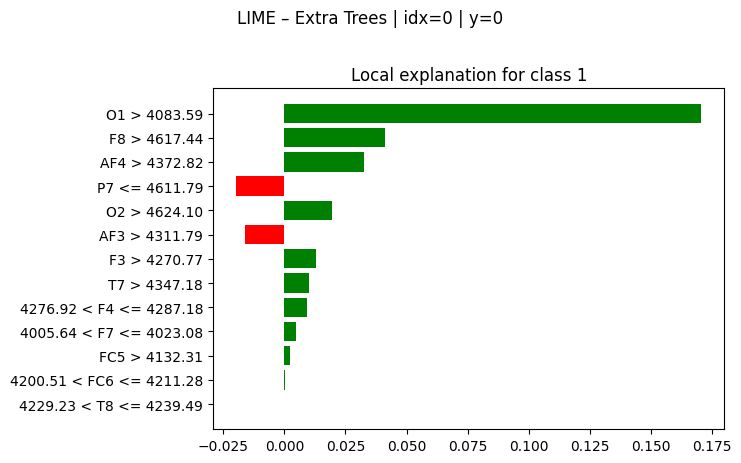

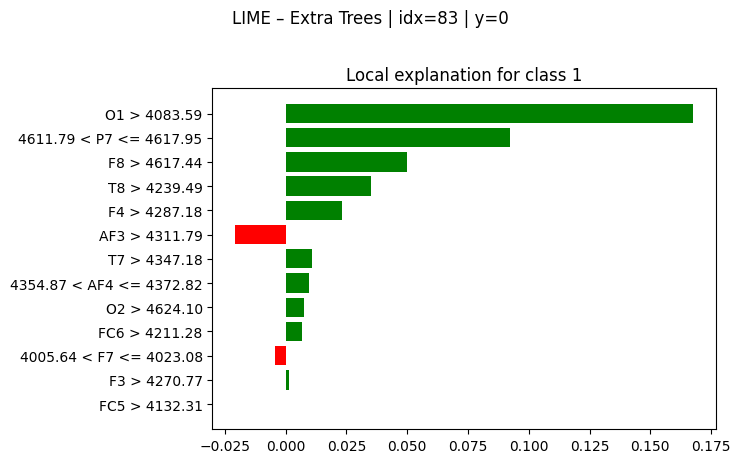

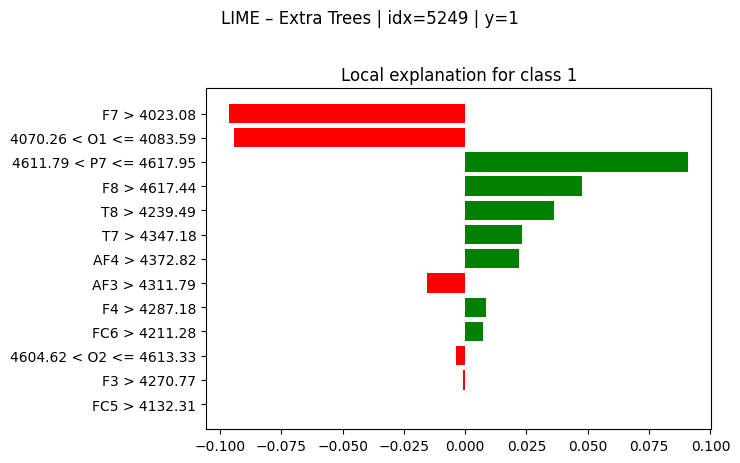

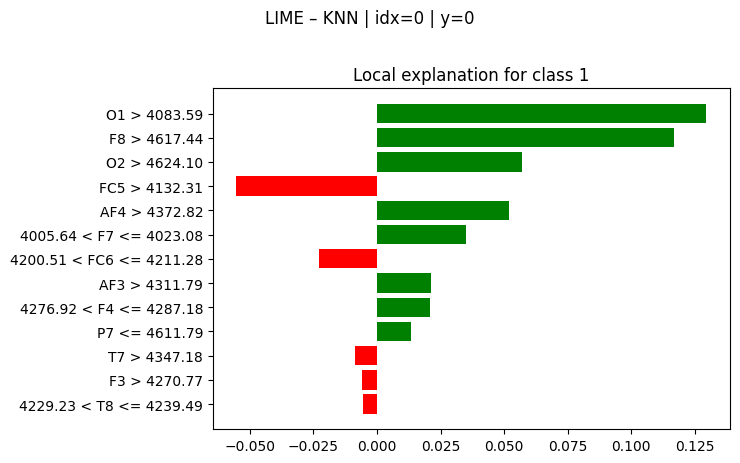

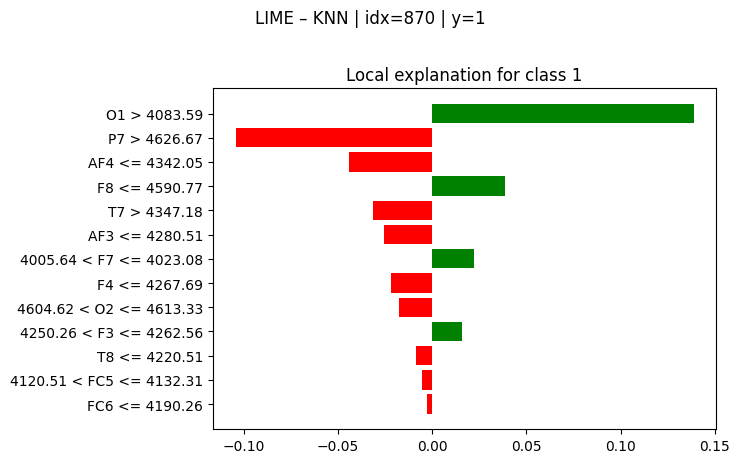

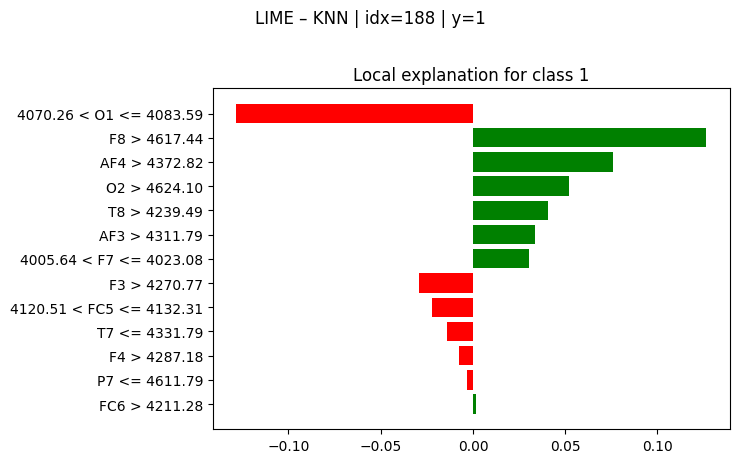

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class_names = [str(c) for c in sorted(np.unique(y_int))]

lime_explainer = LimeTabularExplainer(
    training_data=X_int.values,
    feature_names=feature_names,
    class_names=class_names,
    mode="classification",
    discretize_continuous=True
)

def lime_pretty_plots(model, idx_list, title, num_features=10):
    num_features = min(num_features, X_int.shape[1])

    for idx in idx_list:
        x_instance = X_int.iloc[idx].values

        exp = lime_explainer.explain_instance(
            data_row=x_instance,
            predict_fn=lambda x: model.predict_proba(pd.DataFrame(x, columns=feature_names)),
            num_features=num_features,
            labels=(1,)  
        )

        fig = exp.as_pyplot_figure(label=1)  
        fig.set_size_inches(7.5, 4.5)
        fig.suptitle(f"{title} | idx={idx} | y={y_int.iloc[idx]}", y=1.02, fontsize=12)
        plt.tight_layout()
        plt.show()

# Extra Trees
lime_pretty_plots(extra_trees_best, idx_list_et, "LIME – Extra Trees", num_features=14)

# KNN
lime_pretty_plots(knn_best_no_sc, idx_list_knn, "LIME – KNN", num_features=14)


## Zaključak


U ovom radu izvršena je sveobuhvatna analiza EEG skupa podataka za zadatak klasifikacije stanja očiju (otvorene/zatvorene), sa fokusom na performanse modela i njihovu interpretabilnost. Nakon analize utvrđeno je da podaci potiču iz kontinuiranog EEG merenja i da sadrže izražene ekstremne vrednosti (outlier-e). 


Takve vrednosti nisu uklonjene jer predstavljaju realne pojave,tj bitne podatke, a eksperimentalni rezultati su pokazali da zadržavanje outliera u većini slučajeva dovodi do boljih performansi modela, posebno kod stablastih algoritama.

Analiza korelacije između EEG kanala i  uklanjanje pojedinačnih atributa pokazali su da je kanal P8 najmanje informativan i deo grupe visoko korelisanih feature-a. Njegovo izbacivanje iz skupa podataka dovelo je do blagog, ali konzistentnog poboljšanja tačnosti, što je dodatno potvrđeno analizom feature importance vrednosti. Time je potvrđena ispravnost početne pretpostavke zasnovane na korelaciji i fiziološkoj interpretaciji EEG signala.

U fazi modelovanja ispitano je više algoritama, pri čemu su se kao najbolji pokazali KNN i Extra Trees. KNN je postigao najvišu tačnost, ali se pokazao osetljivijim na raspodelu podataka i lokalne varijacije, dok je Extra Trees dao stabilnije rezultate. Optimizacija hiperparametara donela je relativno mala poboljšanja u odnosu na baseline modele, što ukazuje da su inicijalne postavke bile blizu optimalnih i da je sam skup podataka dobro razdvojiv.

Odrađena je interpretabilnosti modela korišćenjem SHAP i LIME metoda. Globalna SHAP analiza pokazala je da modeli najveći značaj pridaju EEG kanalima iz okcipitalne i frontalne regije (O1, O2, F7, F8, AF3, AF4), što je u skladu sa ulogom ovih regiona u vizuelnoj obradi i pažnji. Lokalna SHAP i LIME objašnjenja omogućila su detaljan uvid u pojedinačne odluke modela, pokazujući kako kombinacija pozitivnih i negativnih doprinosa dovodi do konačne predikcije.

Analiza pojedinačnih uzoraka pokazala je da su sigurne predikcije one kod kojih jedna grupa EEG kanala jasno dominira, dok se dileme i potencijalni false positive slučajevi javljaju kod graničnih instanci, gde su pozitivni i negativni doprinosi slične jačine. Ovakvo ponašanje je očekivano za EEG podatke i distance-based modele poput KNN-a. Važno je istaći da se isti kanali ponavljaju kao relevantni u SHAP i LIME analizama.


### Poređenje performansi

Na slici se nalazi poredjene accuracy-ja kod baseline modela i nakon izbacivanje visoko korelisane kolone i optmizacije hiperparametara

![Poređenje](PoredjenjeAcc.png)


### Feature importance

Nakon odradjenog feature importance se videlo da je bila dobra odluka izbaciti kolonu P8 jer je ispalo da ima minimalni feature importance

![FeatureImp](featureimp.jpg)


### Primena SHAP-a

![shap](shap.png)

### Primena LIME-a

![lime](lime.png)